In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,mean_squared_error, f1_score,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from imblearn.over_sampling import SMOTE
from matplotlib.colors import ListedColormap
from scipy.stats import spearmanr

# Regression Algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNetCV, SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,HistGradientBoostingRegressor,RandomForestRegressor

#### Normal

In [ ]:
df = pd.read_csv('Traindata.csv')
df.shape

(150150, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [ ]:
df.head(1)

record_ID        week  store_id  sku_id  total_price  base_price  \
0          1  17-01-2011      8091  216418      99.0375    111.8625   

   is_featured_sku  is_display_sku  units_sold  
0                0               0          20

In [ ]:
df.dropna(inplace = True)
df.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

record_ID       store_id         sku_id    total_price  \
count  150149.000000  150149.000000  150149.000000  150149.000000   
mean   106270.971795    9199.420935  254761.195226     206.626751   
std     61385.825580     615.593192   85547.587866     103.308516   
min         1.000000    8023.000000  216233.000000      41.325000   
25%     53111.000000    8562.000000  217217.000000     130.387500   
50%    106226.000000    9371.000000  222087.000000     198.075000   
75%    159452.000000    9731.000000  245338.000000     233.700000   
max    212644.000000    9984.000000  679023.000000     562.162500   

          base_price  is_featured_sku  is_display_sku     units_sold  
count  150149.000000    150149.000000   150149.000000  150149.000000  
mean      219.424262         0.095612        0.133201      51.674543  
std       110.960204         0.294059        0.339793      60.207962  
min        61.275000         0.000000        0.000000       1.000000  
25%       133.237500         0.000000        0.000000      20.000000  
50%       205.912500         0.000000        0.000000      35.000000  
75%       234.412500         0.000000        0.000000      62.000000  
max       562.162500         1.000000        1.000000    2876.000000

<ipython-input-8-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

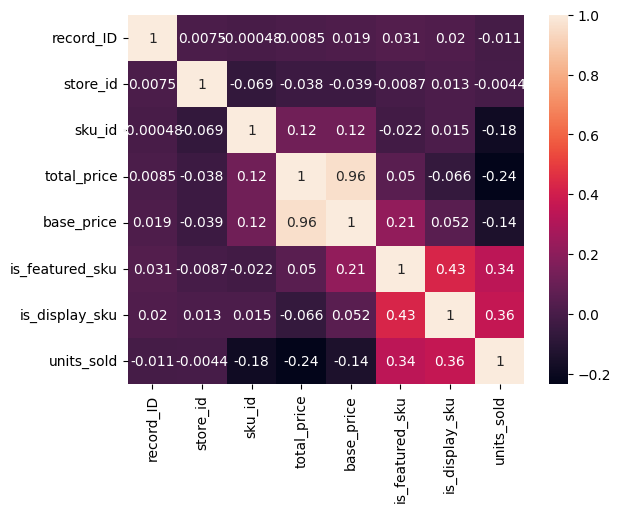

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150149 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150149 non-null  int64  
 1   week             150149 non-null  object 
 2   store_id         150149 non-null  int64  
 3   sku_id           150149 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150149 non-null  float64
 6   is_featured_sku  150149 non-null  int64  
 7   is_display_sku   150149 non-null  int64  
 8   units_sold       150149 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 11.5+ MB


In [ ]:
# Select the target column for correlation analysis
target_column = df.iloc[:, 8]

# Calculate the correlations between each column and the target column
correlations = df.iloc[:, 0:9].corrwith(target_column).sort_values(ascending=False)

# Create a DataFrame to store the results
correlation_df = pd.DataFrame({'Column': correlations.index, 'Correlation': correlations.values.astype(float)})

# Display the DataFrame sorted by correlation values in descending order
correlation_df = correlation_df.reindex(correlation_df['Correlation'].abs().sort_values(ascending=False).index)

# Print the DataFrame
print(correlation_df)

            Column  Correlation
0       units_sold     1.000000
1   is_display_sku     0.362661
2  is_featured_sku     0.337750
7      total_price    -0.235625
6           sku_id    -0.184381
5       base_price    -0.140022
4        record_ID    -0.010608
3         store_id    -0.004369


<ipython-input-10-a5d26e416fc8>:5: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.iloc[:, 0:9].corrwith(target_column).sort_values(ascending=False)


In [ ]:
x = df[['is_display_sku','is_featured_sku','total_price','sku_id']]
y = df[['units_sold']]

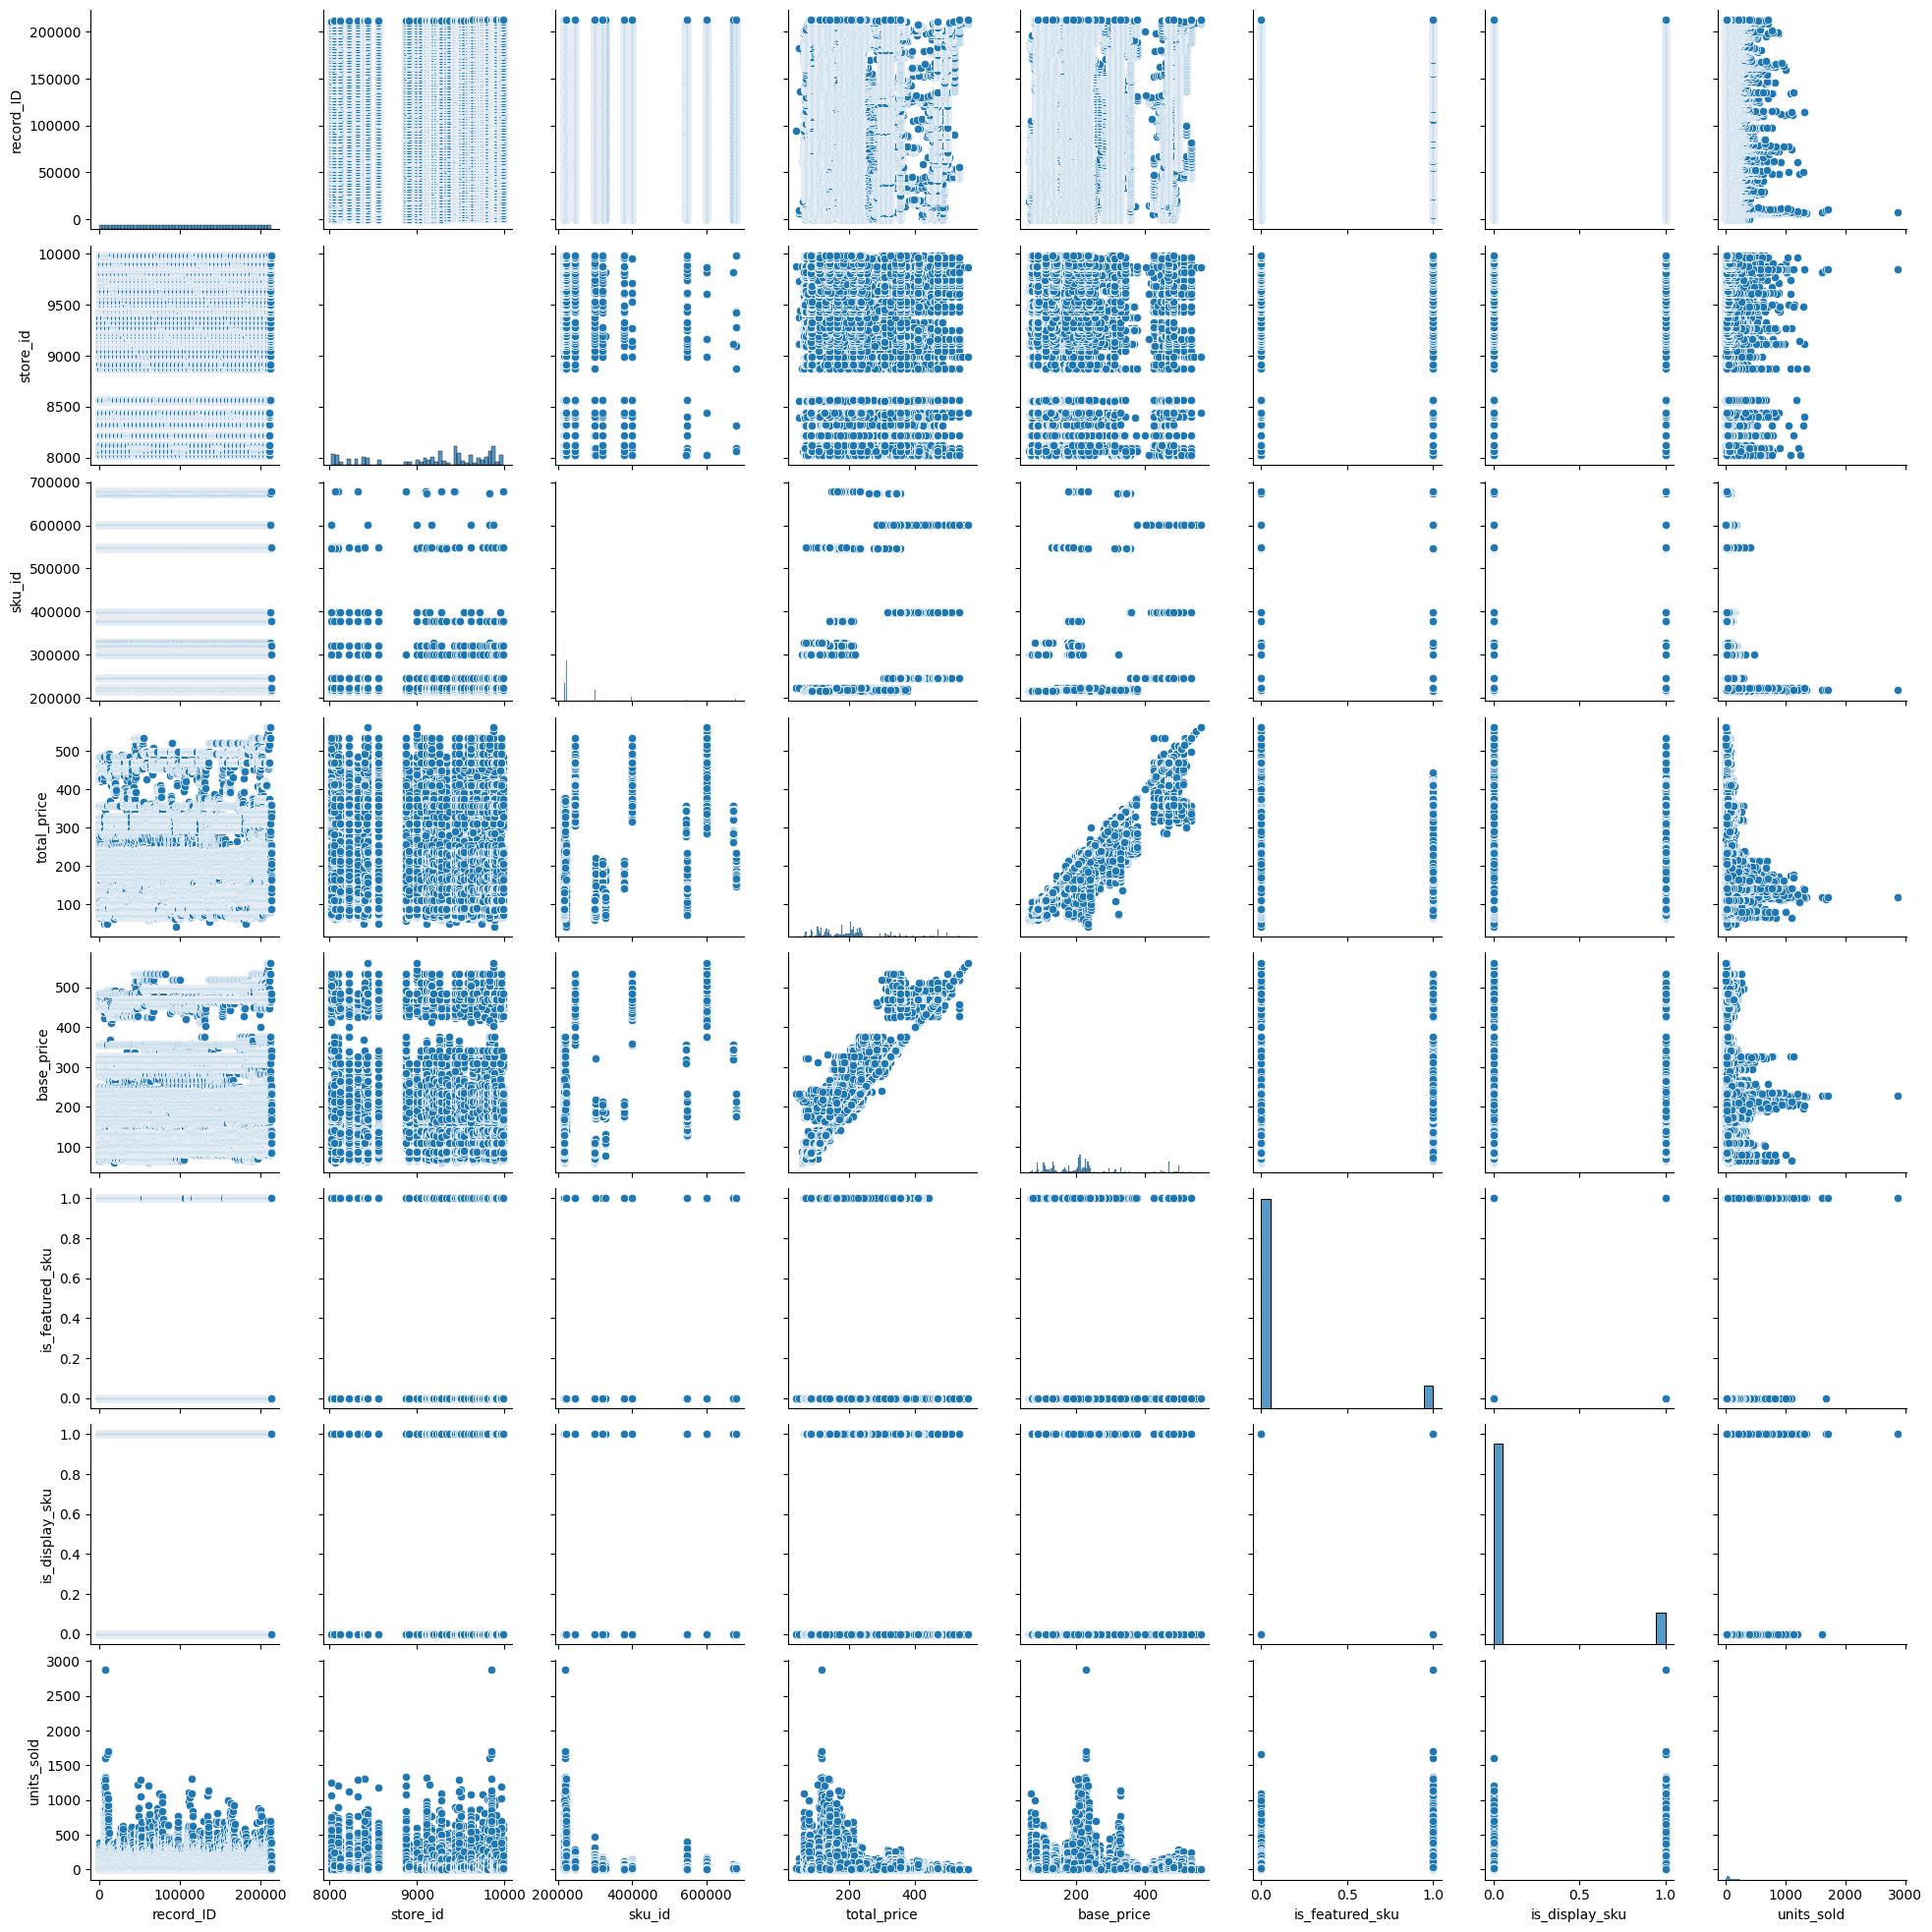

In [ ]:
sns.pairplot(df)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, random_state = 0)

##### Train Test

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(x_train)
scaled_df = pd.DataFrame(X_scaled_train, columns=x_train.columns)
x_train = scaled_df

scaler = StandardScaler()
X_scaled_test = scaler.fit_transform(x_test)
scaled_df = pd.DataFrame(X_scaled_test, columns=x_train.columns)
x_test = scaled_df

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120119, 4)
(30030, 4)
(120119, 1)
(30030, 1)


In [ ]:
regression_rmse = []
regression_models = []
r2_scores= []
def fit_predict_regression(model, x_train, x_test, y_train, y_test,regression_rmse):
    model = model
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    rmse= mean_squared_error(y_test, y_pred, squared=False)
    regression_rmse.append(rmse)
    r2_scores.append(r2_score(y_test, y_pred))
    regression_models.append(str(model))
    print(f"RMSE of {model}: {rmse}")
    #plt.figure(figsize = (4,3))
    #x_values = range(len(y_pred))
    # Plot 'expected' as dots (scatter plot)
    #plt.scatter(x_values, y_test, label='Expected', marker='o', color='red')
    # Plot 'y_pred' as a line
    #plt.plot(x_values, y_pred, label='Predicted', linestyle='-', color='green')
    # Add labels and legend
    #plt.title(f"{model}")
    #plt.xlabel('Sample Index')
    #plt.ylabel('Values')
    #plt.legend()
    # Show the plot
    #plt.show()
    return y_pred

y_pred_lr = fit_predict_regression(LinearRegression(),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_r = fit_predict_regression(Ridge(alpha=.5),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_l = fit_predict_regression(Lasso(alpha=.5),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_e = fit_predict_regression(ElasticNetCV(cv = 5, random_state = 0),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_sgd = fit_predict_regression(SGDRegressor(max_iter=1000, tol=1),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_svr = fit_predict_regression(SVR(C=1.0, epsilon=0.2, kernel = "poly"),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_knn = fit_predict_regression(KNeighborsRegressor(n_neighbors=9),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_dtr = fit_predict_regression(DecisionTreeRegressor(),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_gbr = fit_predict_regression(GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=0,loss='squared_error'),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_hgbr = fit_predict_regression(HistGradientBoostingRegressor(),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_rf = fit_predict_regression(RandomForestRegressor(),x_train,x_test,y_train,y_test,regression_rmse)

RMSE of LinearRegression(): 52.726573296228665
RMSE of Ridge(alpha=0.5): 52.72657348875049
RMSE of Lasso(alpha=0.5): 52.73555068759575


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE of ElasticNetCV(cv=5, random_state=0): 52.730300725542094


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE of SGDRegressor(tol=1): 52.74986345039384


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE of SVR(epsilon=0.2, kernel='poly'): 53.29430809777923
RMSE of KNeighborsRegressor(n_neighbors=9): 44.33312892388575
RMSE of DecisionTreeRegressor(): 51.51922472417189


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE of GradientBoostingRegressor(max_depth=1, n_estimators=1000, random_state=0): 50.09069606092912


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE of HistGradientBoostingRegressor(): 45.012137991825945


<ipython-input-15-6f3f128d2165>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RMSE of RandomForestRegressor(): 48.21098445639136


In [ ]:
dic = {"Base Models":regression_models,
       "RMSE":regression_rmse,
       "R2 Scores":r2_scores}
dfr = pd.DataFrame(dic)
dfr.sort_values(by = ['RMSE'], ascending = True)

Base Models       RMSE  R2 Scores
6                  KNeighborsRegressor(n_neighbors=9)  44.333129   0.468388
9                     HistGradientBoostingRegressor()  45.012138   0.451979
10                            RandomForestRegressor()  48.210984   0.371319
8   GradientBoostingRegressor(max_depth=1, n_estim...  50.090696   0.321340
7                             DecisionTreeRegressor()  51.519225   0.282079
0                                  LinearRegression()  52.726573   0.248036
1                                    Ridge(alpha=0.5)  52.726573   0.248036
3                  ElasticNetCV(cv=5, random_state=0)  52.730301   0.247930
2                                    Lasso(alpha=0.5)  52.735551   0.247780
4                                 SGDRegressor(tol=1)  52.749863   0.247371
5                     SVR(epsilon=0.2, kernel='poly')  53.294308   0.231755

In [ ]:
regression_rmse = []
r2_scores= []
y_pred_lr = y_pred_lr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_lr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_lr))

y_pred_r = y_pred_r.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_r, squared=False))
r2_scores.append(r2_score(y_test, y_pred_r))

y_pred_l = y_pred_l.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_l, squared=False))
r2_scores.append(r2_score(y_test, y_pred_l))

y_pred_e = y_pred_e.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_e, squared=False))
r2_scores.append(r2_score(y_test, y_pred_e))

y_pred_sgd = y_pred_sgd.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_sgd, squared=False))
r2_scores.append(r2_score(y_test, y_pred_sgd))

y_pred_svr = y_pred_svr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_svr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_svr))

y_pred_knn = y_pred_knn.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_knn, squared=False))
r2_scores.append(r2_score(y_test, y_pred_knn))

y_pred_dtr = y_pred_dtr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_dtr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_dtr))

y_pred_gbr = y_pred_gbr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_gbr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_gbr))

y_pred_hgbr = y_pred_hgbr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_hgbr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_hgbr))

y_pred_rf = y_pred_rf.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_rf, squared=False))
r2_scores.append(r2_score(y_test, y_pred_rf))

dic = {"Base Models":regression_models,
       "RMSE":regression_rmse,
       "R2 Scores":r2_scores}
dfrr = pd.DataFrame(dic)
dfrr.sort_values(by = ['RMSE'], ascending = True)

Base Models       RMSE  R2 Scores
6                  KNeighborsRegressor(n_neighbors=9)  44.348193   0.468027
9                     HistGradientBoostingRegressor()  45.088562   0.450116
10                            RandomForestRegressor()  48.278945   0.369546
8   GradientBoostingRegressor(max_depth=1, n_estim...  50.149001   0.319759
7                             DecisionTreeRegressor()  51.546618   0.281315
1                                    Ridge(alpha=0.5)  52.720881   0.248198
0                                  LinearRegression()  52.720963   0.248196
3                  ElasticNetCV(cv=5, random_state=0)  52.729279   0.247959
2                                    Lasso(alpha=0.5)  52.733927   0.247826
4                                 SGDRegressor(tol=1)  52.747299   0.247445
5                     SVR(epsilon=0.2, kernel='poly')  53.377854   0.229345

#### All Outlier Removal

In [ ]:
df = pd.read_csv('Traindata.csv')
df.shape

(150150, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [ ]:
df.head(1)

record_ID        week  store_id  sku_id  total_price  base_price  \
0          1  17-01-2011      8091  216418      99.0375    111.8625   

   is_featured_sku  is_display_sku  units_sold  
0                0               0          20

In [ ]:
df.dropna(inplace = True)
df.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

record_ID       store_id         sku_id    total_price  \
count  150149.000000  150149.000000  150149.000000  150149.000000   
mean   106270.971795    9199.420935  254761.195226     206.626751   
std     61385.825580     615.593192   85547.587866     103.308516   
min         1.000000    8023.000000  216233.000000      41.325000   
25%     53111.000000    8562.000000  217217.000000     130.387500   
50%    106226.000000    9371.000000  222087.000000     198.075000   
75%    159452.000000    9731.000000  245338.000000     233.700000   
max    212644.000000    9984.000000  679023.000000     562.162500   

          base_price  is_featured_sku  is_display_sku     units_sold  
count  150149.000000    150149.000000   150149.000000  150149.000000  
mean      219.424262         0.095612        0.133201      51.674543  
std       110.960204         0.294059        0.339793      60.207962  
min        61.275000         0.000000        0.000000       1.000000  
25%       133.237500         0.000000        0.000000      20.000000  
50%       205.912500         0.000000        0.000000      35.000000  
75%       234.412500         0.000000        0.000000      62.000000  
max       562.162500         1.000000        1.000000    2876.000000

<ipython-input-8-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

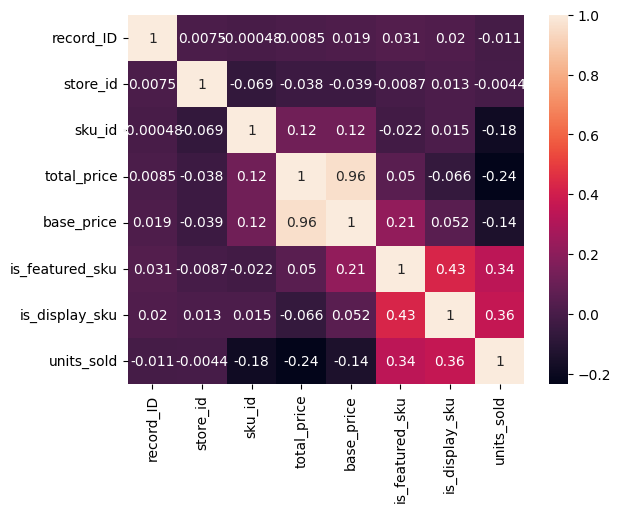

In [ ]:
sns.heatmap(df.corr(), annot = True)

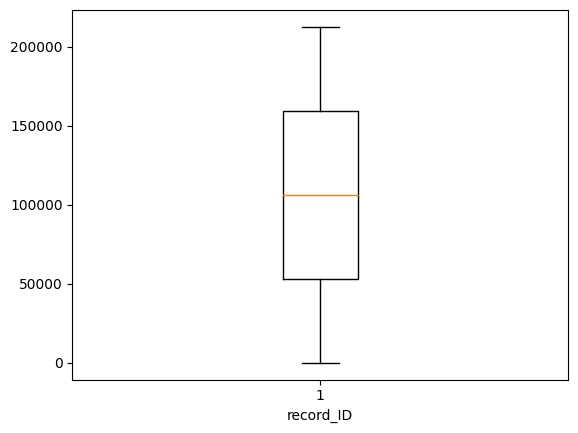

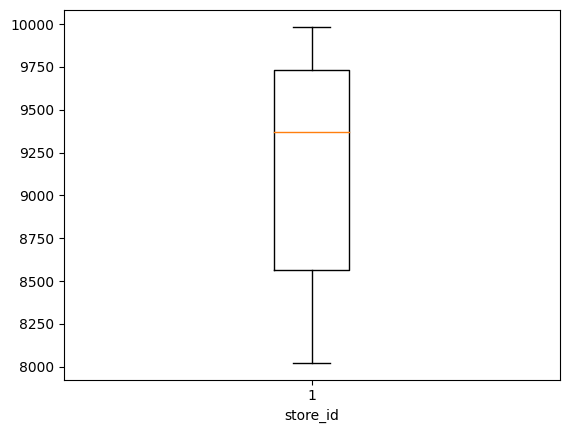

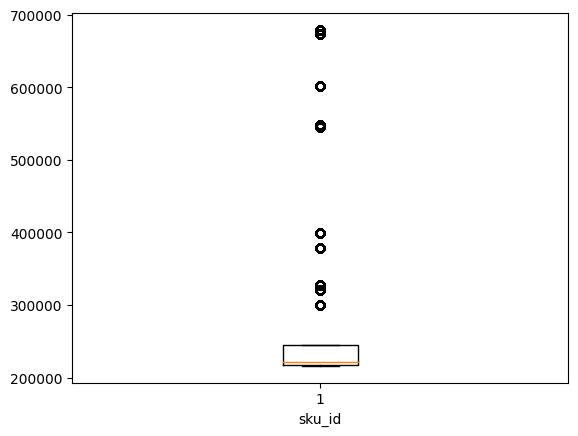

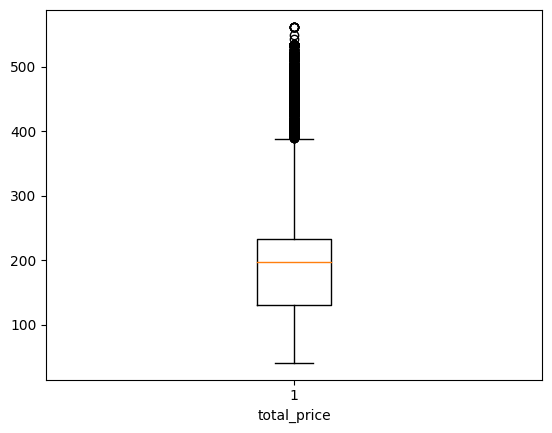

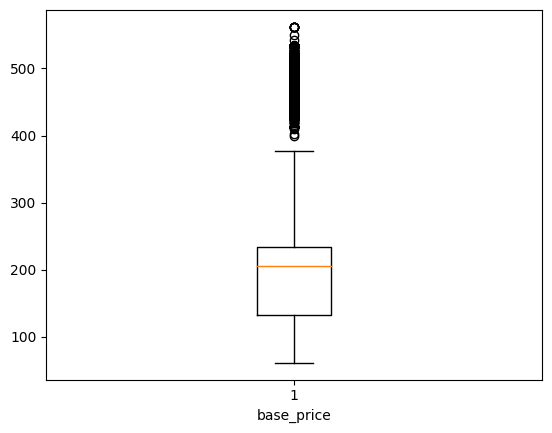

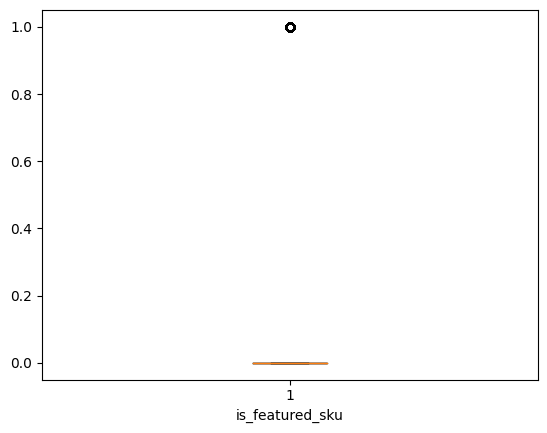

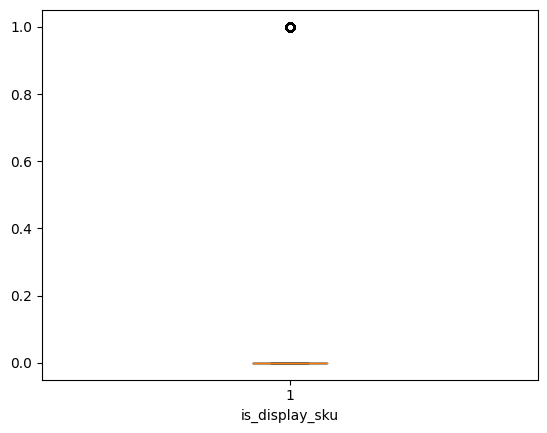

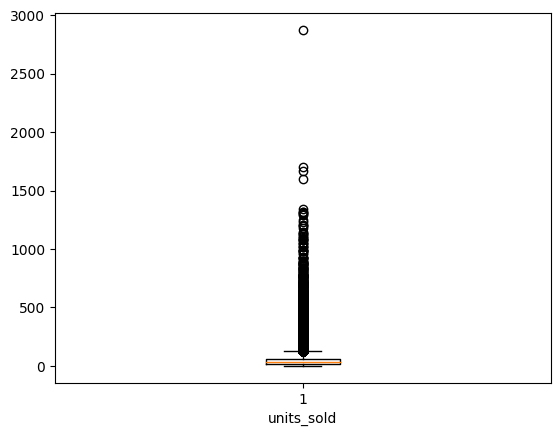

In [ ]:
for i in df.columns:
    if df[i].dtypes != 'object':
        plt.boxplot(x =df[i])
        plt.xlabel(i)
        plt.show()

In [ ]:
df[['base_price','units_sold']].groupby('units_sold').count()

base_price
units_sold            
1                  411
2                  427
3                  402
4                 1382
5                  979
...                ...
1341                 1
1599                 1
1669                 1
1705                 1
2876                 1

[708 rows x 1 columns]

<Axes: >

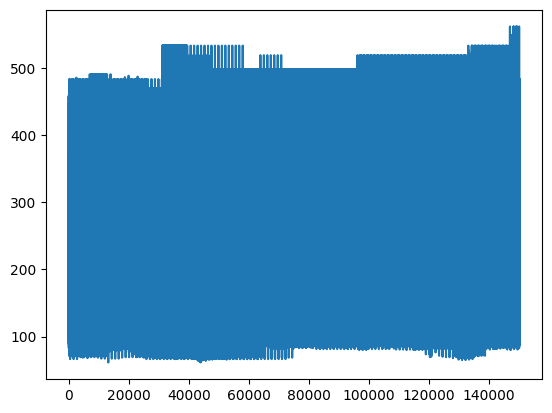

In [ ]:
df['base_price'].plot(kind = 'line')

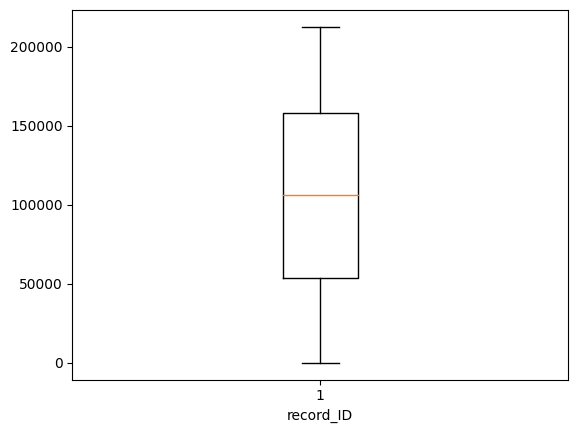

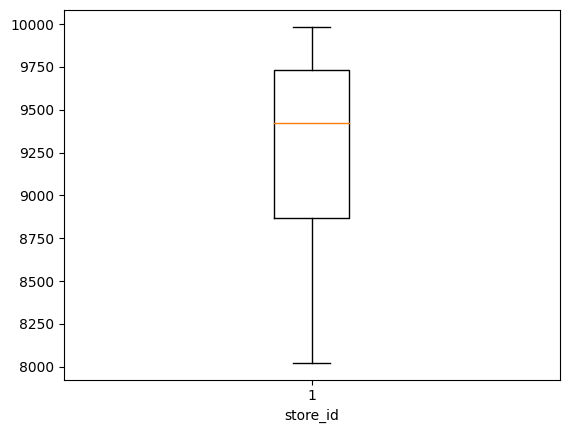

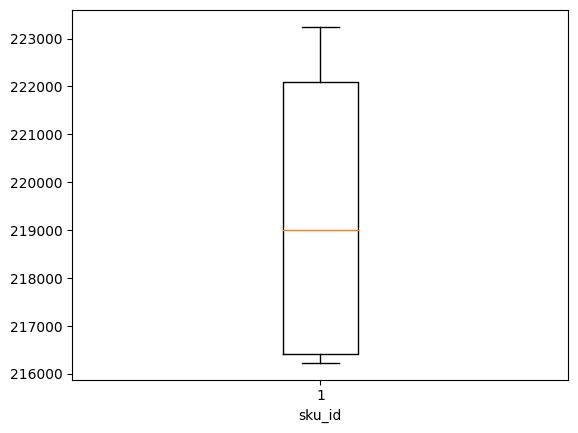

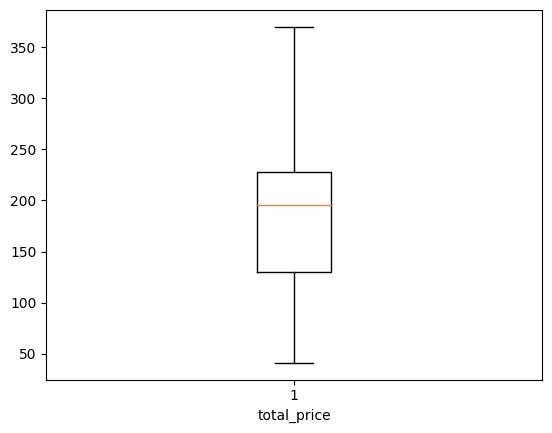

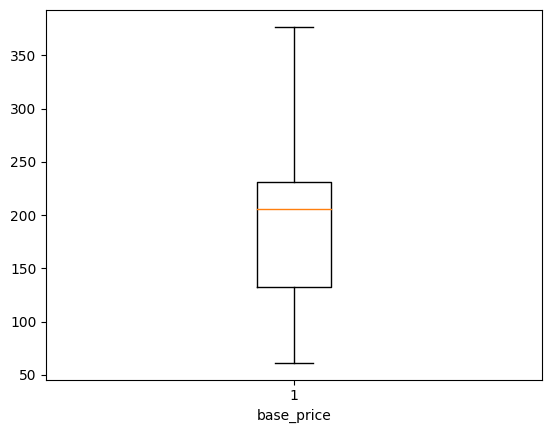

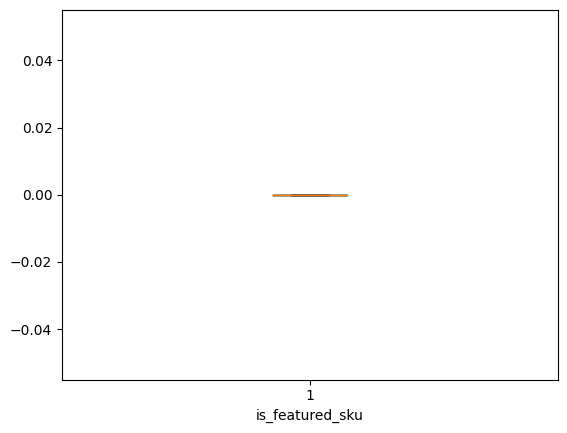

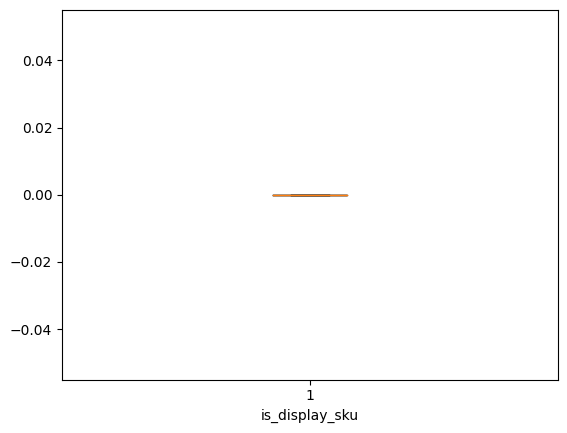

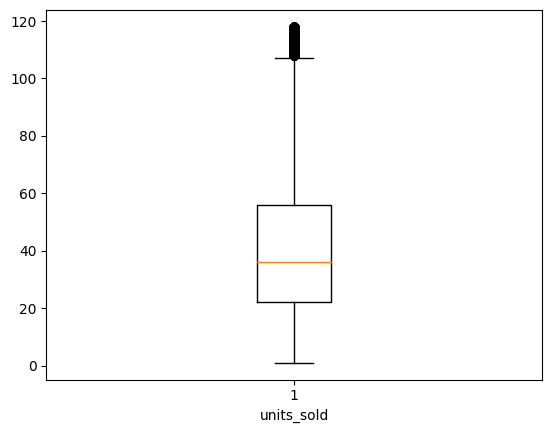

In [ ]:
Q1 = df.loc[:,'base_price'].quantile(0.25)
Q3 = df.loc[:,'base_price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df.loc[:,'base_price'] >= Q1 - 1.5*IQR) & (df.loc[:,'base_price'] <= Q3 + 1.5*IQR)]

Q1 = df.loc[:,'is_display_sku'].quantile(0.25)
Q3 = df.loc[:,'is_display_sku'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df.loc[:,'is_display_sku'] >= Q1 - 1.5*IQR) & (df.loc[:,'is_display_sku'] <= Q3 + 1.5*IQR)]

Q1 = df.loc[:,'is_featured_sku'].quantile(0.25)
Q3 = df.loc[:,'is_featured_sku'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df.loc[:,'is_featured_sku'] >= Q1 - 1.5*IQR) & (df.loc[:,'is_featured_sku'] <= Q3 + 1.5*IQR)]

Q1 = df.loc[:,'total_price'].quantile(0.25)
Q3 = df.loc[:,'total_price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df.loc[:,'total_price'] >= Q1 - 1.5*IQR) & (df.loc[:,'total_price'] <= Q3 + 1.5*IQR)]

for i in df.columns:
    if df[i].dtypes != 'object':
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[i] >= Q1 - 1.5*IQR) & (df[i] <= Q3 + 1.5*IQR)]
        plt.boxplot(x =df[i])
        plt.xlabel(i)
        plt.show()


In [ ]:
df.shape

(87729, 9)

In [ ]:
# Select the target column for correlation analysis
target_column = df.iloc[:, 8]

# Calculate the correlations between each column and the target column
correlations = df.iloc[:, 0:9].corrwith(target_column).sort_values(ascending=False)

# Create a DataFrame to store the results
correlation_df = pd.DataFrame({'Column': correlations.index, 'Correlation': correlations.values.astype(float)})

# Display the DataFrame sorted by correlation values in descending order
correlation_df = correlation_df.reindex(correlation_df['Correlation'].abs().sort_values(ascending=False).index)

# Print the DataFrame
print(correlation_df)

            Column  Correlation
0       units_sold     1.000000
5      total_price    -0.158982
4       base_price    -0.137002
3           sku_id    -0.023600
2         store_id    -0.020754
1        record_ID    -0.014944
6  is_featured_sku          NaN
7   is_display_sku          NaN


<ipython-input-19-a5d26e416fc8>:5: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.iloc[:, 0:9].corrwith(target_column).sort_values(ascending=False)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87729 entries, 0 to 150146
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_ID        87729 non-null  int64  
 1   week             87729 non-null  object 
 2   store_id         87729 non-null  int64  
 3   sku_id           87729 non-null  int64  
 4   total_price      87729 non-null  float64
 5   base_price       87729 non-null  float64
 6   is_featured_sku  87729 non-null  int64  
 7   is_display_sku   87729 non-null  int64  
 8   units_sold       87729 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 6.7+ MB


In [ ]:
x = df.iloc[:, 4:8]
y = df.iloc[:, 8]

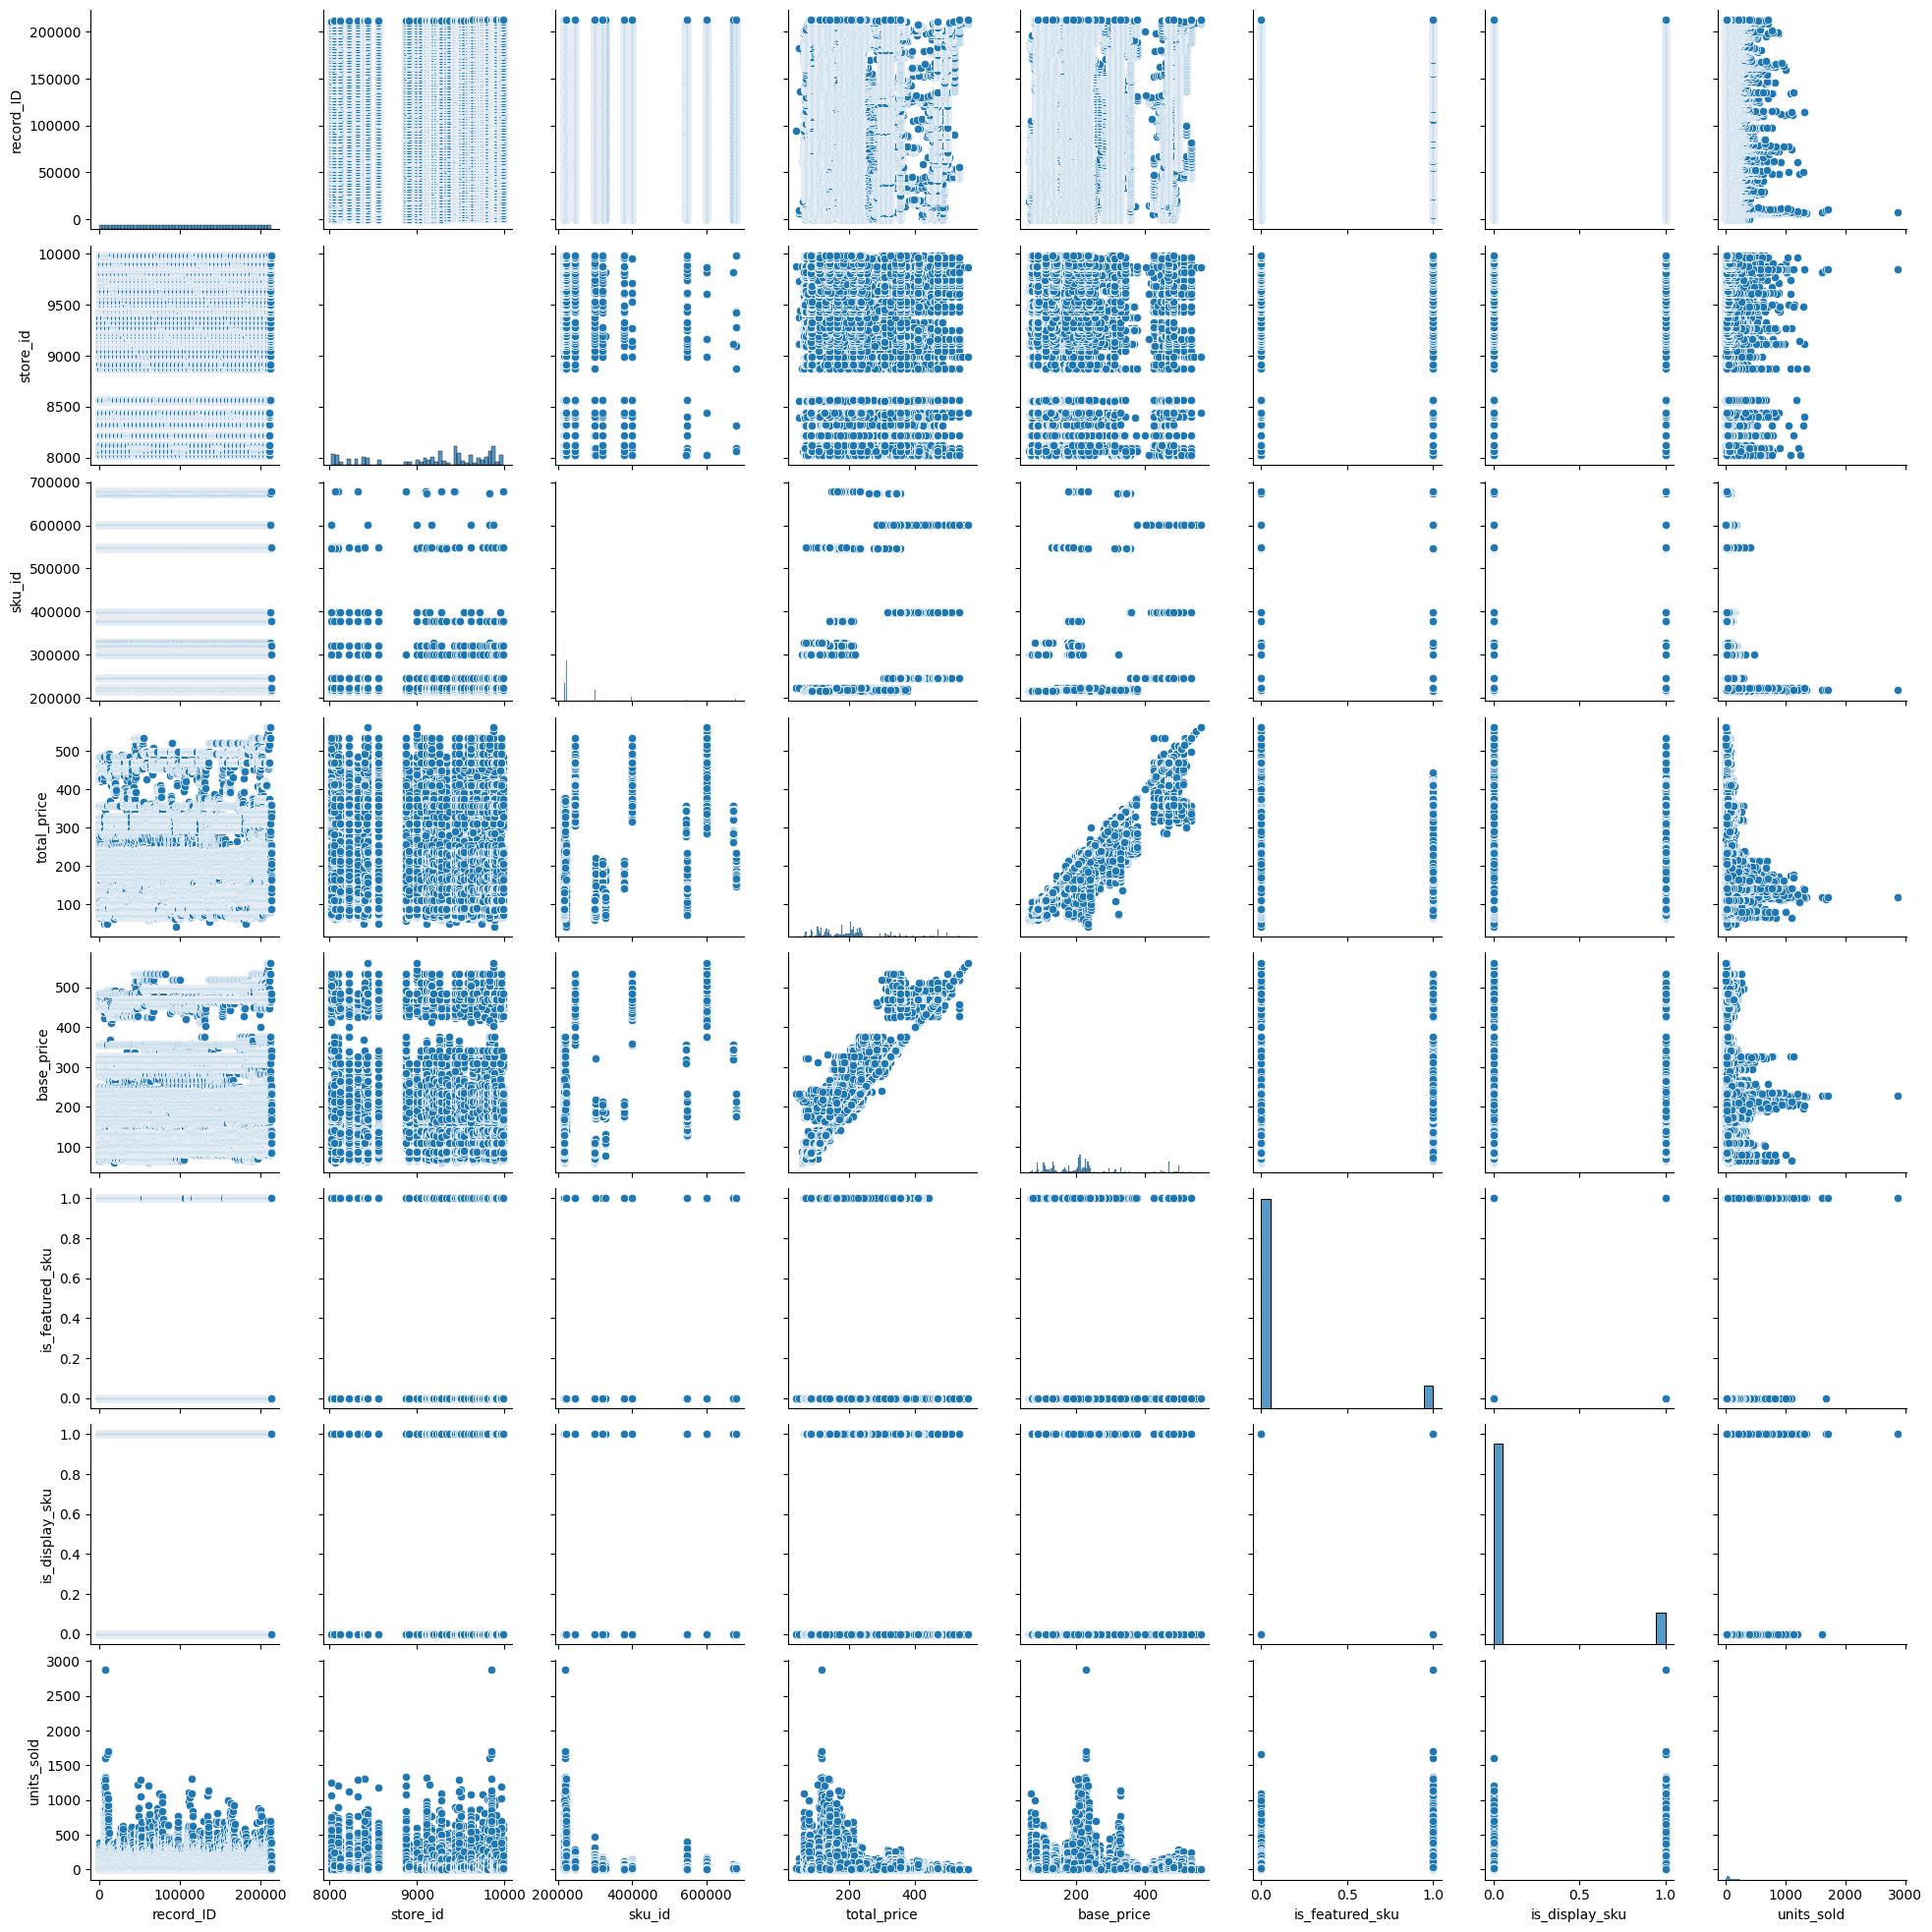

In [ ]:
sns.pairplot(df)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, random_state = 0)

##### Train Test

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(x_train)
scaled_df = pd.DataFrame(X_scaled_train, columns=x_train.columns)
x_train = scaled_df

scaler = StandardScaler()
X_scaled_test = scaler.fit_transform(x_test)
scaled_df = pd.DataFrame(X_scaled_test, columns=x_train.columns)
x_test = scaled_df

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70183, 4)
(17546, 4)
(70183,)
(17546,)


RMSE of LinearRegression(): 24.844547731857688


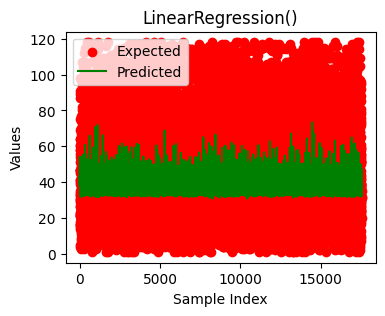

RMSE of Ridge(alpha=0.5): 24.844548868665367


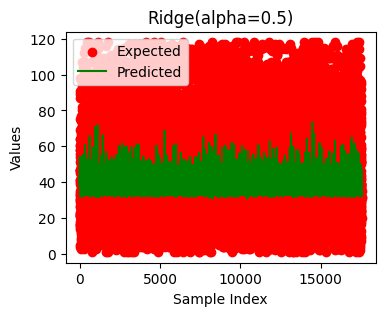

RMSE of Lasso(alpha=0.5): 24.936207660893825


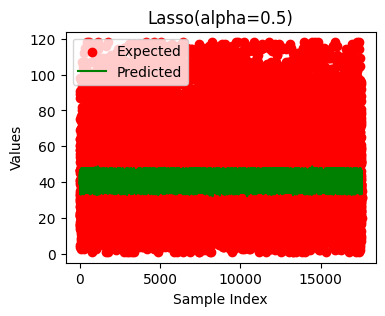

RMSE of ElasticNetCV(cv=5, random_state=0): 24.8478005787253


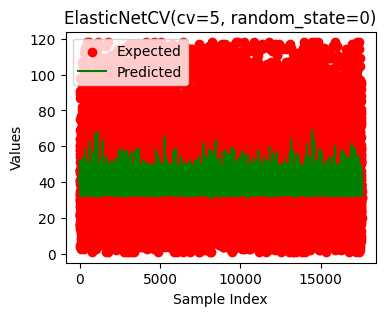

RMSE of SGDRegressor(tol=1): 24.84466527336182


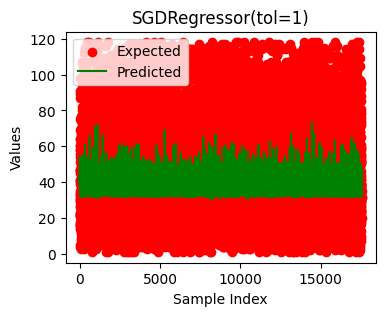

RMSE of SVR(epsilon=0.2, kernel='poly'): 25.684453474534877


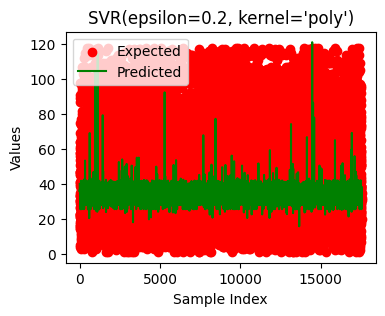

RMSE of KNeighborsRegressor(n_neighbors=9): 24.30093368383441


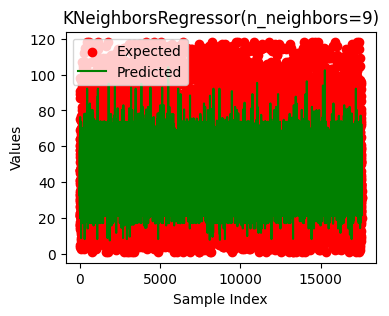

RMSE of DecisionTreeRegressor(): 24.25135516458575


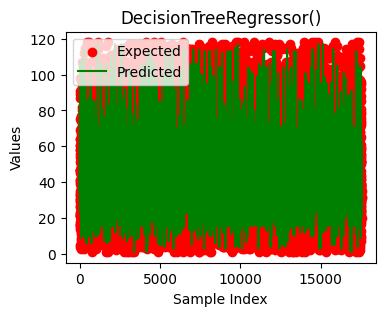

RMSE of GradientBoostingRegressor(max_depth=1, n_estimators=1000, random_state=0): 23.166749666865915


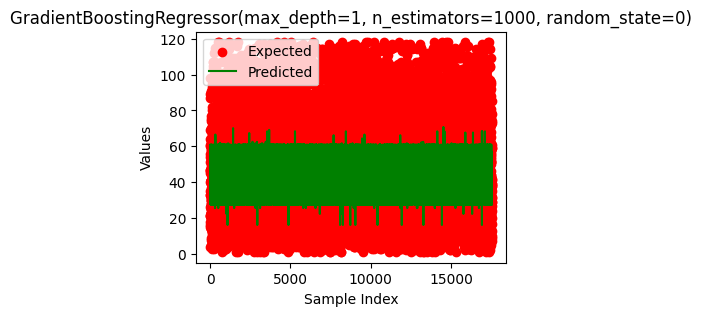

RMSE of HistGradientBoostingRegressor(): 22.595219110977986


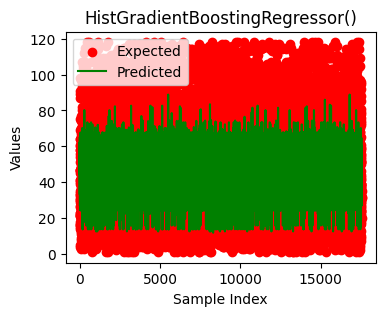

RMSE of RandomForestRegressor(): 23.653388291329545


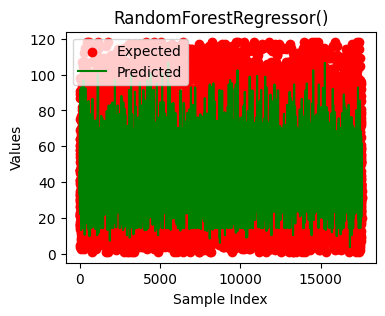

In [ ]:
regression_rmse = []
regression_models = []
r2_scores= []
def fit_predict_regression(model, x_train, x_test, y_train, y_test,regression_rmse):
    model = model
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    rmse= mean_squared_error(y_test, y_pred, squared=False)
    regression_rmse.append(rmse)
    r2_scores.append(r2_score(y_test, y_pred))
    regression_models.append(str(model))
    print(f"RMSE of {model}: {rmse}")
    plt.figure(figsize = (4,3))
    x_values = range(len(y_pred))
    # Plot 'expected' as dots (scatter plot)
    plt.scatter(x_values, y_test, label='Expected', marker='o', color='red')
    # Plot 'y_pred' as a line
    plt.plot(x_values, y_pred, label='Predicted', linestyle='-', color='green')
    # Add labels and legend
    plt.title(f"{model}")
    plt.xlabel('Sample Index')
    plt.ylabel('Values')
    plt.legend()
    # Show the plot
    plt.show()
    return y_pred

y_pred_lr = fit_predict_regression(LinearRegression(),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_r = fit_predict_regression(Ridge(alpha=.5),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_l = fit_predict_regression(Lasso(alpha=.5),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_e = fit_predict_regression(ElasticNetCV(cv = 5, random_state = 0),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_sgd = fit_predict_regression(SGDRegressor(max_iter=1000, tol=1),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_svr = fit_predict_regression(SVR(C=1.0, epsilon=0.2, kernel = "poly"),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_knn = fit_predict_regression(KNeighborsRegressor(n_neighbors=9),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_dtr = fit_predict_regression(DecisionTreeRegressor(),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_gbr = fit_predict_regression(GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=0,loss='squared_error'),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_hgbr = fit_predict_regression(HistGradientBoostingRegressor(),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_rf = fit_predict_regression(RandomForestRegressor(),x_train,x_test,y_train,y_test,regression_rmse)

In [ ]:
dic = {"Base Models":regression_models,
       "RMSE":regression_rmse,
       "R2 Scores":r2_scores}
dfr = pd.DataFrame(dic)
dfr.sort_values(by = ['RMSE'], ascending = True)

Base Models       RMSE  R2 Scores
9                     HistGradientBoostingRegressor()  22.595219   0.200407
8   GradientBoostingRegressor(max_depth=1, n_estim...  23.166750   0.159445
10                            RandomForestRegressor()  23.653388   0.123760
7                             DecisionTreeRegressor()  24.251355   0.078897
6                  KNeighborsRegressor(n_neighbors=9)  24.300934   0.075127
0                                  LinearRegression()  24.844548   0.033285
1                                    Ridge(alpha=0.5)  24.844549   0.033285
4                                 SGDRegressor(tol=1)  24.844665   0.033276
3                  ElasticNetCV(cv=5, random_state=0)  24.847801   0.033032
2                                    Lasso(alpha=0.5)  24.936208   0.026139
5                     SVR(epsilon=0.2, kernel='poly')  25.684453  -0.033182

In [ ]:
test_pred = pd.DataFrame()
test_pred['y_test'] = y_test
test_pred['Linear Regression'] = y_pred_lr
test_pred['Ridge'] = y_pred_r
test_pred['Lasso'] = y_pred_l
test_pred['ElasticNet'] = y_pred_e
test_pred['SGD'] = y_pred_sgd
test_pred['SVR'] = y_pred_svr
test_pred['KNN'] =y_pred_knn
test_pred['Decision Tree'] = y_pred_dtr
test_pred['Gradient Boost'] = y_pred_gbr
test_pred['Hist Gradient Boost'] = y_pred_hgbr
test_pred['Random Forest'] = y_pred_rf
test_pred

y_test  Linear Regression      Ridge      Lasso  ElasticNet  \
58499       69          54.180169  54.176744  43.739149   52.349978   
18352       45          39.758712  39.758932  40.482252   39.876374   
130328      98          45.188110  45.188337  45.594824   45.309085   
761         33          37.747824  37.748041  38.588707   37.864259   
42654       56          39.678276  39.678496  40.406510   39.795889   
...        ...                ...        ...        ...         ...   
54804       13          44.021795  44.022021  44.496568   44.142058   
132156      32          32.117337  32.117547  33.286780   32.230337   
138602      35          43.780488  43.780714  44.269342   43.900604   
23280       31          33.726047  33.726259  34.801617   33.840029   
111102      20          40.442414  40.442635  41.126057   40.560493   

              SGD        SVR        KNN  Decision Tree  Gradient Boost  \
58499   54.223997  40.043528  64.777778      79.600000       52.440417   
18352   39.765638  36.040897  47.777778      39.608013       45.390328   
130328  45.432543  37.245189  56.777778      60.865591       57.056620   
761     37.666784  35.558454  32.333333      34.058394       31.288044   
42654   39.681683  36.034886  42.444444      49.825112       45.390328   
...           ...        ...        ...            ...             ...   
54804   44.215208  36.527938  28.000000      31.732484       30.853627   
132156  31.789993  25.618232  44.333333      43.116740       40.595176   
138602  43.963345  36.431478  39.888889      45.590486       40.598242   
23280   33.469076  30.338805  22.333333      27.105935       27.545683   
111102  40.479248  36.068535  65.111111      61.211382       56.494725   

        Hist Gradient Boost  Random Forest  
58499             54.281548      75.850269  
18352             45.038066      39.736171  
130328            62.390564      60.675155  
761               33.160931      32.997741  
42654             51.003359      49.960641  
...                     ...            ...  
54804             29.619328      31.674491  
132156            40.661908      43.150513  
138602            40.321987      45.594191  
23280             27.270934      27.130205  
111102            59.093075      61.453057  

[17546 rows x 12 columns]

In [ ]:
regression_rmse = []
r2_scores= []
y_pred_lr = y_pred_lr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_lr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_lr))

y_pred_r = y_pred_r.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_r, squared=False))
r2_scores.append(r2_score(y_test, y_pred_r))

y_pred_l = y_pred_l.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_l, squared=False))
r2_scores.append(r2_score(y_test, y_pred_l))

y_pred_e = y_pred_e.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_e, squared=False))
r2_scores.append(r2_score(y_test, y_pred_e))

y_pred_sgd = y_pred_sgd.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_sgd, squared=False))
r2_scores.append(r2_score(y_test, y_pred_sgd))

y_pred_svr = y_pred_svr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_svr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_svr))

y_pred_knn = y_pred_knn.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_knn, squared=False))
r2_scores.append(r2_score(y_test, y_pred_knn))

y_pred_dtr = y_pred_dtr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_dtr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_dtr))

y_pred_gbr = y_pred_gbr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_gbr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_gbr))

y_pred_hgbr = y_pred_hgbr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_hgbr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_hgbr))

y_pred_rf = y_pred_rf.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_rf, squared=False))
r2_scores.append(r2_score(y_test, y_pred_rf))

In [ ]:
dic = {"Base Models":regression_models,
       "RMSE":regression_rmse,
       "R2 Scores":r2_scores}
dfrr = pd.DataFrame(dic)
dfrr.sort_values(by = ['RMSE'], ascending = True)

Base Models       RMSE  R2 Scores
9                     HistGradientBoostingRegressor()  22.601519   0.199961
8   GradientBoostingRegressor(max_depth=1, n_estim...  23.172874   0.159000
10                            RandomForestRegressor()  23.635522   0.125084
7                             DecisionTreeRegressor()  24.245271   0.079359
6                  KNeighborsRegressor(n_neighbors=9)  24.305085   0.074811
0                                  LinearRegression()  24.848183   0.033002
1                                    Ridge(alpha=0.5)  24.848269   0.032996
3                  ElasticNetCV(cv=5, random_state=0)  24.854825   0.032485
4                                 SGDRegressor(tol=1)  24.860204   0.032067
2                                    Lasso(alpha=0.5)  24.938566   0.025955
5                     SVR(epsilon=0.2, kernel='poly')  25.752104  -0.038632

#### VIF and Best

In [ ]:
df = pd.read_csv('Traindata.csv')
df.shape

(150150, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [ ]:
df.head(1)

record_ID        week  store_id  sku_id  total_price  base_price  \
0          1  17-01-2011      8091  216418      99.0375    111.8625   

   is_featured_sku  is_display_sku  units_sold  
0                0               0          20

In [ ]:
df.dropna(inplace = True)
df.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

record_ID       store_id         sku_id    total_price  \
count  150149.000000  150149.000000  150149.000000  150149.000000   
mean   106270.971795    9199.420935  254761.195226     206.626751   
std     61385.825580     615.593192   85547.587866     103.308516   
min         1.000000    8023.000000  216233.000000      41.325000   
25%     53111.000000    8562.000000  217217.000000     130.387500   
50%    106226.000000    9371.000000  222087.000000     198.075000   
75%    159452.000000    9731.000000  245338.000000     233.700000   
max    212644.000000    9984.000000  679023.000000     562.162500   

          base_price  is_featured_sku  is_display_sku     units_sold  
count  150149.000000    150149.000000   150149.000000  150149.000000  
mean      219.424262         0.095612        0.133201      51.674543  
std       110.960204         0.294059        0.339793      60.207962  
min        61.275000         0.000000        0.000000       1.000000  
25%       133.237500         0.000000        0.000000      20.000000  
50%       205.912500         0.000000        0.000000      35.000000  
75%       234.412500         0.000000        0.000000      62.000000  
max       562.162500         1.000000        1.000000    2876.000000

<ipython-input-8-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

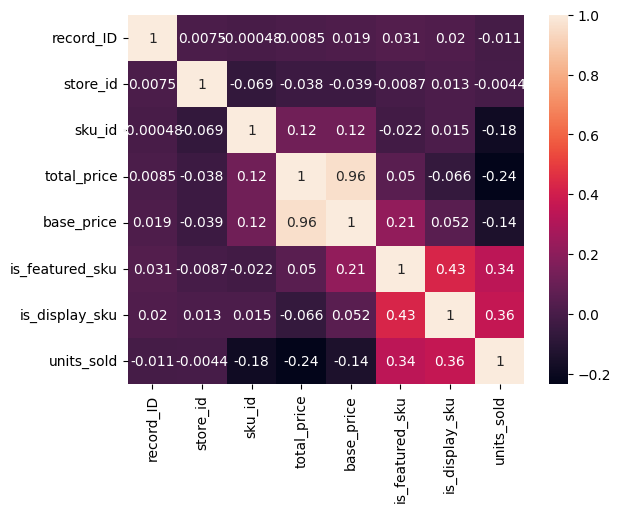

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'units_sold') ):
        col_list.append(col)

X = df[col_list]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

           feature       VIF
0        record_ID  3.261466
1           sku_id  5.211038
2      total_price  4.247786
3  is_featured_sku  1.364297
4   is_display_sku  1.414198


In [ ]:
df.drop(columns = 'store_id', inplace = True, axis = 1)

In [ ]:
x = df[['record_ID','sku_id','total_price','is_featured_sku','is_display_sku']]
y = df['units_sold']

In [ ]:
df.shape

(150149, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150149 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150149 non-null  int64  
 1   week             150149 non-null  object 
 2   store_id         150149 non-null  int64  
 3   sku_id           150149 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150149 non-null  float64
 6   is_featured_sku  150149 non-null  int64  
 7   is_display_sku   150149 non-null  int64  
 8   units_sold       150149 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 11.5+ MB


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, random_state = 0)

##### Train Test

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(x_train)
scaled_df = pd.DataFrame(X_scaled_train, columns=x_train.columns)
x_train = scaled_df

scaler = StandardScaler()
X_scaled_test = scaler.fit_transform(x_test)
scaled_df = pd.DataFrame(X_scaled_test, columns=x_train.columns)
x_test = scaled_df

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120119, 5)
(30030, 5)
(120119,)
(30030,)


In [ ]:
regression_rmse = []
regression_models = []
r2_scores= []
def fit_predict_regression(model, x_train, x_test, y_train, y_test,regression_rmse):
    model = model
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    rmse= mean_squared_error(y_test, y_pred, squared=False)
    regression_rmse.append(rmse)
    r2_scores.append(r2_score(y_test, y_pred))
    regression_models.append(str(model))
    print(f"RMSE of {model}: {rmse}")
    #plt.figure(figsize = (4,3))
    #x_values = range(len(y_pred))
    # Plot 'expected' as dots (scatter plot)
    #plt.scatter(x_values, y_test, label='Expected', marker='o', color='red')
    # Plot 'y_pred' as a line
    #plt.plot(x_values, y_pred, label='Predicted', linestyle='-', color='green')
    # Add labels and legend
    #plt.title(f"{model}")
    #plt.xlabel('Sample Index')
    #plt.ylabel('Values')
    #plt.legend()
    # Show the plot
    #plt.show()
    return y_pred

y_pred_lr = fit_predict_regression(LinearRegression(),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_r = fit_predict_regression(Ridge(alpha=.5),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_l = fit_predict_regression(Lasso(alpha=.5),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_e = fit_predict_regression(ElasticNetCV(cv = 5, random_state = 0),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_sgd = fit_predict_regression(SGDRegressor(max_iter=1000, tol=1),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_svr = fit_predict_regression(SVR(C=1.0, epsilon=0.2, kernel = "poly"),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_knn = fit_predict_regression(KNeighborsRegressor(n_neighbors=9),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_dtr = fit_predict_regression(DecisionTreeRegressor(),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_gbr = fit_predict_regression(GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=0,loss='squared_error'),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_hgbr = fit_predict_regression(HistGradientBoostingRegressor(),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_rf = fit_predict_regression(RandomForestRegressor(),x_train,x_test,y_train,y_test,regression_rmse)

RMSE of LinearRegression(): 52.72178567461855
RMSE of Ridge(alpha=0.5): 52.721785810834255
RMSE of Lasso(alpha=0.5): 52.72831909835125
RMSE of ElasticNetCV(cv=5, random_state=0): 52.72505010915605
RMSE of SGDRegressor(tol=1): 52.764753137162096
RMSE of SVR(epsilon=0.2, kernel='poly'): 53.11013579066453
RMSE of KNeighborsRegressor(n_neighbors=9): 40.14869402298118
RMSE of DecisionTreeRegressor(): 56.910482019597794
RMSE of GradientBoostingRegressor(max_depth=1, n_estimators=1000, random_state=0): 50.05545804934322
RMSE of HistGradientBoostingRegressor(): 42.27429539112079
RMSE of RandomForestRegressor(): 46.13405582502439


In [ ]:
dic = {"Base Models":regression_models,
       "RMSE":regression_rmse,
       "R2 Scores":r2_scores}
dfr = pd.DataFrame(dic)
dfr.sort_values(by = ['RMSE'], ascending = True)

Base Models       RMSE  R2 Scores
6                  KNeighborsRegressor(n_neighbors=9)  40.148694   0.564006
9                     HistGradientBoostingRegressor()  42.274295   0.516618
10                            RandomForestRegressor()  46.134056   0.424320
8   GradientBoostingRegressor(max_depth=1, n_estim...  50.055458   0.322295
0                                  LinearRegression()  52.721786   0.248172
1                                    Ridge(alpha=0.5)  52.721786   0.248172
3                  ElasticNetCV(cv=5, random_state=0)  52.725050   0.248079
2                                    Lasso(alpha=0.5)  52.728319   0.247986
4                                 SGDRegressor(tol=1)  52.764753   0.246947
5                     SVR(epsilon=0.2, kernel='poly')  53.110136   0.237056
7                             DecisionTreeRegressor()  56.910482   0.123963

In [ ]:
regression_rmse = []
r2_scores= []
y_pred_lr = y_pred_lr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_lr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_lr))

y_pred_r = y_pred_r.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_r, squared=False))
r2_scores.append(r2_score(y_test, y_pred_r))

y_pred_l = y_pred_l.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_l, squared=False))
r2_scores.append(r2_score(y_test, y_pred_l))

y_pred_e = y_pred_e.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_e, squared=False))
r2_scores.append(r2_score(y_test, y_pred_e))

y_pred_sgd = y_pred_sgd.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_sgd, squared=False))
r2_scores.append(r2_score(y_test, y_pred_sgd))

y_pred_svr = y_pred_svr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_svr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_svr))

y_pred_knn = y_pred_knn.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_knn, squared=False))
r2_scores.append(r2_score(y_test, y_pred_knn))

y_pred_dtr = y_pred_dtr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_dtr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_dtr))

y_pred_gbr = y_pred_gbr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_gbr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_gbr))

y_pred_hgbr = y_pred_hgbr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_hgbr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_hgbr))

y_pred_rf = y_pred_rf.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_rf, squared=False))
r2_scores.append(r2_score(y_test, y_pred_rf))

In [ ]:
dic = {"Base Models":regression_models,
       "RMSE":regression_rmse,
       "R2 Scores":r2_scores}
dfrr = pd.DataFrame(dic)
dfrr.sort_values(by = ['RMSE'], ascending = True)

Base Models       RMSE  R2 Scores
6                  KNeighborsRegressor(n_neighbors=9)  40.149559   0.563987
9                     HistGradientBoostingRegressor()  42.344317   0.515015
10                            RandomForestRegressor()  46.188431   0.422962
8   GradientBoostingRegressor(max_depth=1, n_estim...  50.113899   0.320711
0                                  LinearRegression()  52.717249   0.248302
1                                    Ridge(alpha=0.5)  52.717249   0.248302
3                  ElasticNetCV(cv=5, random_state=0)  52.721479   0.248181
2                                    Lasso(alpha=0.5)  52.730202   0.247932
4                                 SGDRegressor(tol=1)  52.758998   0.247111
5                     SVR(epsilon=0.2, kernel='poly')  53.222631   0.233820
7                             DecisionTreeRegressor()  56.910482   0.123963

In [ ]:
x_train.shape

(120119, 5)

In [ ]:
neighbours = np.arange(1,100,2)

In [ ]:
neighbours

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])

In [ ]:
neighbours = np.arange(1,300,3)
regression_rmse = []
r2_scores = []
for i in neighbours:
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    rmse= mean_squared_error(y_test, y_pred, squared=False)
    regression_rmse.append(rmse)
    r2_scores.append(r2_score(y_test, y_pred))
    #regression_models.append(str(model))
    #print(f"RMSE of {model}: {rmse}")
    #print(f"R2 of {model}: {r2_score(y_test, y_pred)}")
    print(i)

1
4
7
10
13
16
19
22
25
28
31
34
37
40
43
46
49
52
55
58
61
64
67
70
73
76
79
82
85
88
91
94
97
100
103
106
109
112
115
118
121
124
127
130
133
136
139
142
145
148
151
154
157
160
163
166
169
172
175
178
181
184
187
190
193
196
199
202
205
208
211
214
217
220
223
226
229
232
235
238
241
244
247
250
253
256
259
262
265
268
271
274
277
280
283
286
289
292
295
298


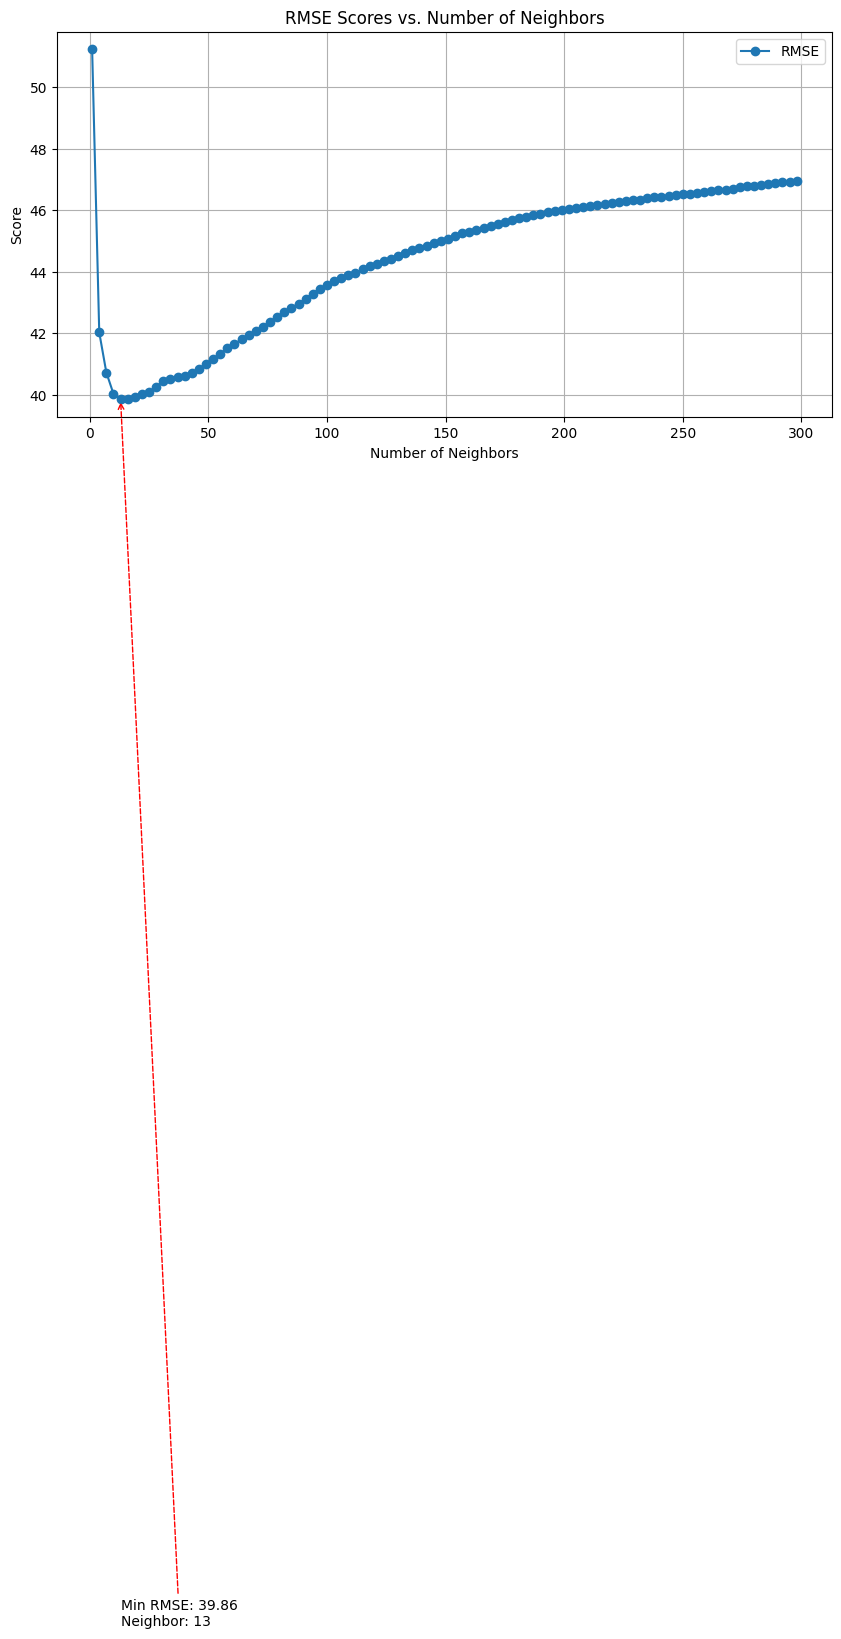

In [ ]:
# Plot RMSE and R^2 scores
plt.figure(figsize=(10, 5))
plt.plot(neighbours, regression_rmse, label='RMSE',marker='o')
#plt.plot(neighbours, r2_scores, label='R^2')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()
plt.title('RMSE Scores vs. Number of Neighbors')
plt.grid()

min_rmse = min(regression_rmse)
min_neighbor = neighbours[regression_rmse.index(min_rmse)]

# Add a line from the lowest RMSE point to the x-axis
plt.annotate(f'Min RMSE: {min_rmse:.2f}\nNeighbor: {min_neighbor}',
             xy=(min_neighbor, min_rmse), xycoords='data',
             xytext=(min_neighbor, 0), textcoords='data',
             arrowprops=dict(arrowstyle='->', color='red', linestyle='--'))

plt.show()

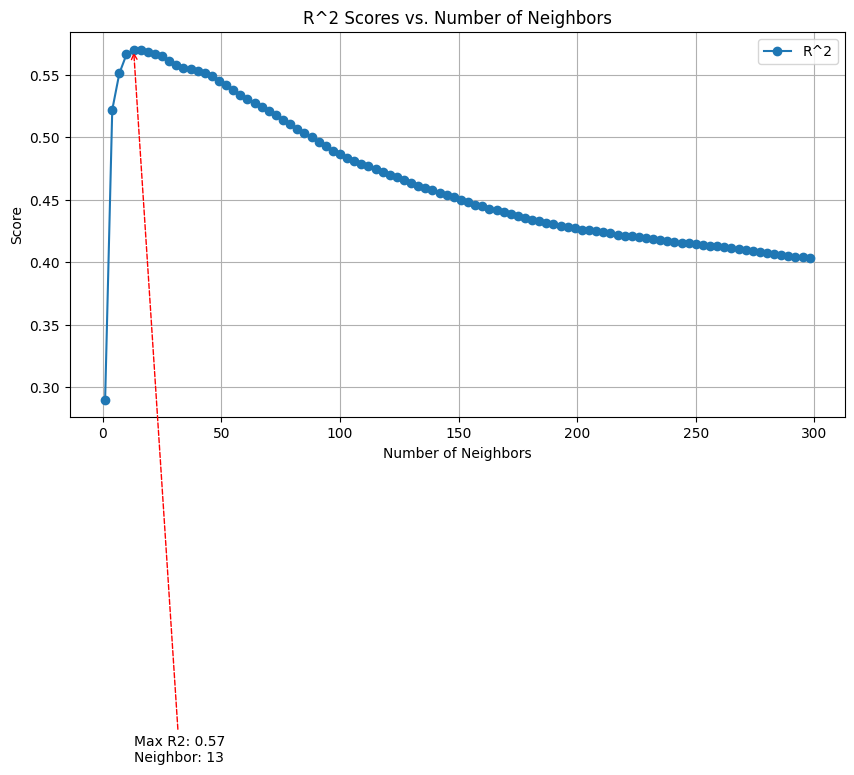

In [ ]:
plt.figure(figsize=(10, 5))
#plt.plot(neighbours, regression_rmse, label='RMSE')
plt.plot(neighbours, r2_scores, label='R^2',marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()
plt.title('R^2 Scores vs. Number of Neighbors')
plt.grid()

max_r2 = max(r2_scores)
max_neighbor = neighbours[r2_scores.index(max_r2)]

# Add a line from the lowest RMSE point to the x-axis
plt.annotate(f'Max R2: {max_r2:.2f}\nNeighbor: {max_neighbor}',
             xy=(max_neighbor, max_r2), xycoords='data',
             xytext=(max_neighbor, 0), textcoords='data',
             arrowprops=dict(arrowstyle='->', color='red', linestyle='--'))

plt.show()

In [ ]:
p = np.arange(1,5,1)
regression_rmse = []
r2_scores = []
for i in p:
    model = KNeighborsRegressor(n_neighbors=13, p = i )
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    rmse= mean_squared_error(y_test, y_pred, squared=False)
    regression_rmse.append(rmse)
    r2_scores.append(r2_score(y_test, y_pred))
    #regression_models.append(str(model))
    #print(f"RMSE of {model}: {rmse}")
    #print(f"R2 of {model}: {r2_score(y_test, y_pred)}")
    print(i)

1
2
3
4


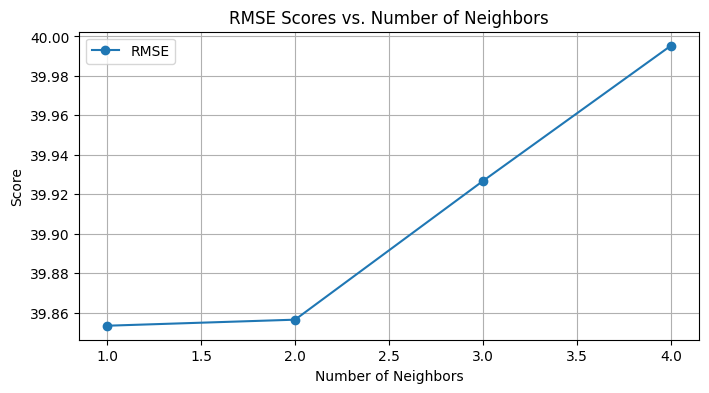

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(p, regression_rmse, label='RMSE',marker='o')
#plt.plot(neighbours, r2_scores, label='R^2')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()
plt.title('RMSE Scores vs. Number of Neighbors')
plt.grid()

min_rmse = min(regression_rmse)
min_neighbor = p[regression_rmse.index(min_rmse)]


plt.show()

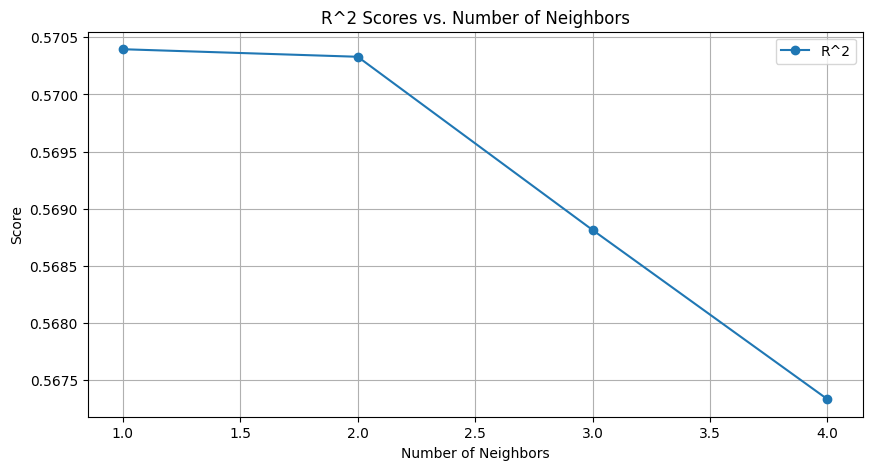

In [ ]:
plt.figure(figsize=(10, 5))
#plt.plot(neighbours, regression_rmse, label='RMSE')
plt.plot(p, r2_scores, label='R^2',marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()
plt.title('R^2 Scores vs. Number of Neighbors')
plt.grid()

max_r2 = max(r2_scores)
max_neighbor = p[r2_scores.index(max_r2)]
plt.show()

In [ ]:
model = KNeighborsRegressor(n_neighbors=13, p = 1 )
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
rmse= mean_squared_error(y_test, y_pred, squared=False)
r2_score = r2_score(y_test, y_pred)
print('RMSE: ',rmse)
print('R2: ',r2_score)

RMSE:  39.85337166695397
R2:  0.5703961687562928


In [ ]:
test = pd.read_csv('DataSetRetail.csv')
x_test = test[['record_ID','sku_id','total_price','is_featured_sku','is_display_sku']]

In [ ]:
model = KNeighborsRegressor(n_neighbors=13, p = 1 )
model.fit(x,y)

KNeighborsRegressor(n_neighbors=13, p=1)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
submission = pd.DataFrame()
submission['record_ID'] = x_test['record_ID']
submission['units_sold_float'] = y_pred
submission['units_sold'] = y_pred.astype(int)

In [ ]:
submission.to_csv('submission_my.csv')

#### All Outlier Removal + VIF

In [ ]:
df = pd.read_csv('Traindata.csv')
df.shape

(150150, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [ ]:
df.head(1)

record_ID        week  store_id  sku_id  total_price  base_price  \
0          1  17-01-2011      8091  216418      99.0375    111.8625   

   is_featured_sku  is_display_sku  units_sold  
0                0               0          20

In [ ]:
df.dropna(inplace = True)
df.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

record_ID       store_id         sku_id    total_price  \
count  150149.000000  150149.000000  150149.000000  150149.000000   
mean   106270.971795    9199.420935  254761.195226     206.626751   
std     61385.825580     615.593192   85547.587866     103.308516   
min         1.000000    8023.000000  216233.000000      41.325000   
25%     53111.000000    8562.000000  217217.000000     130.387500   
50%    106226.000000    9371.000000  222087.000000     198.075000   
75%    159452.000000    9731.000000  245338.000000     233.700000   
max    212644.000000    9984.000000  679023.000000     562.162500   

          base_price  is_featured_sku  is_display_sku     units_sold  
count  150149.000000    150149.000000   150149.000000  150149.000000  
mean      219.424262         0.095612        0.133201      51.674543  
std       110.960204         0.294059        0.339793      60.207962  
min        61.275000         0.000000        0.000000       1.000000  
25%       133.237500         0.000000        0.000000      20.000000  
50%       205.912500         0.000000        0.000000      35.000000  
75%       234.412500         0.000000        0.000000      62.000000  
max       562.162500         1.000000        1.000000    2876.000000

<ipython-input-21-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

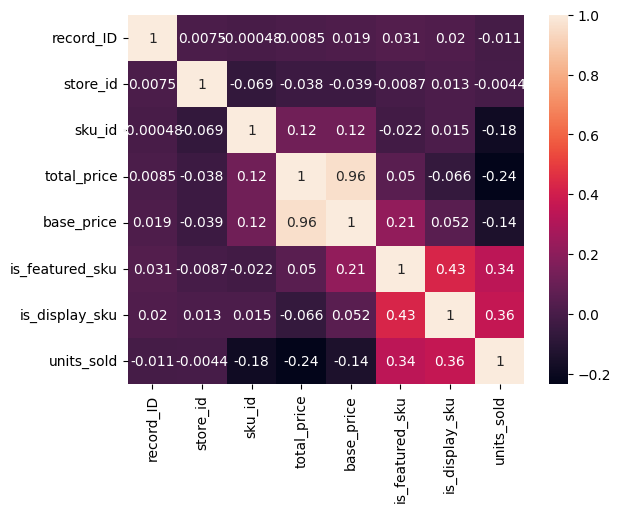

In [ ]:
sns.heatmap(df.corr(), annot = True)

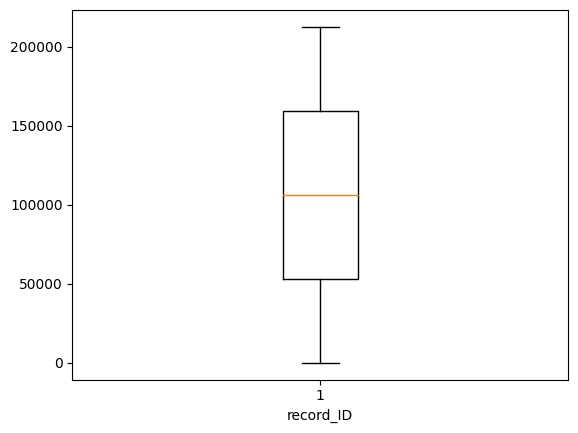

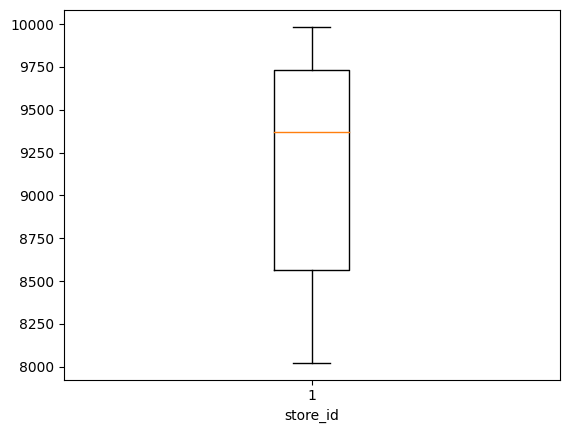

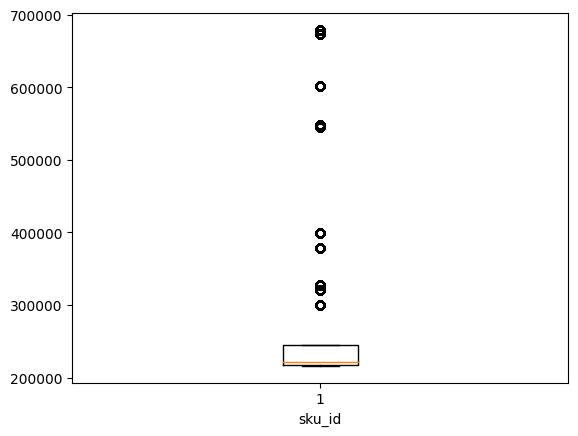

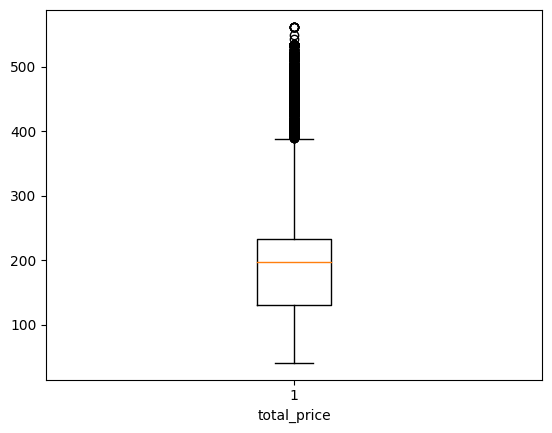

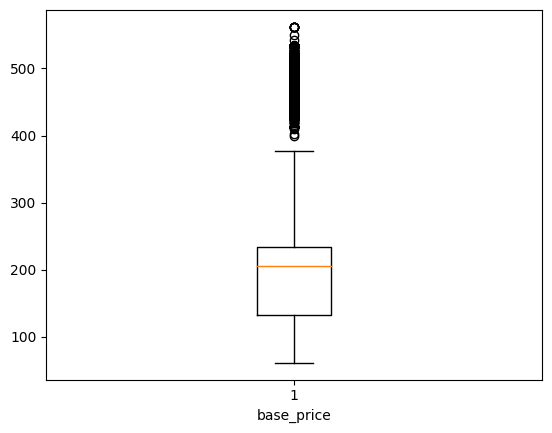

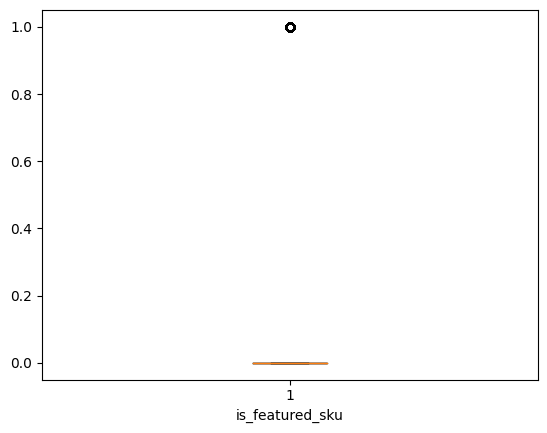

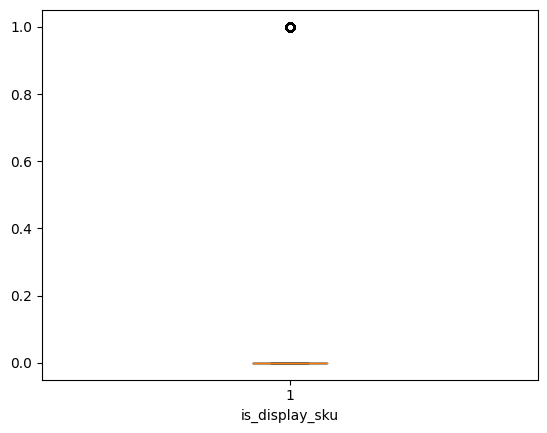

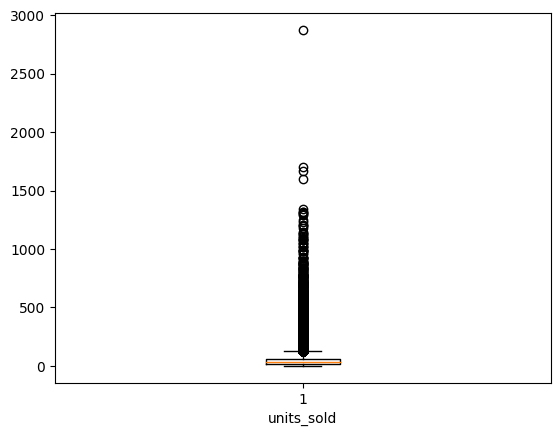

In [ ]:
for i in df.columns:
    if df[i].dtypes != 'object':
        plt.boxplot(x =df[i])
        plt.xlabel(i)
        plt.show()

In [ ]:
df[['base_price','units_sold']].groupby('units_sold').count()

base_price
units_sold            
1                  411
2                  427
3                  402
4                 1382
5                  979
...                ...
1341                 1
1599                 1
1669                 1
1705                 1
2876                 1

[708 rows x 1 columns]

In [ ]:
#df['base_price'].plot(kind = 'line')

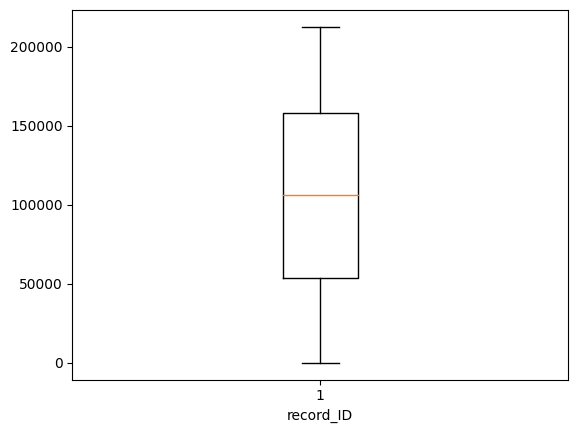

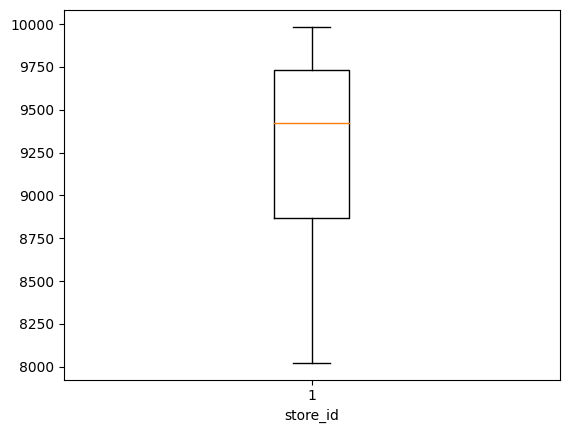

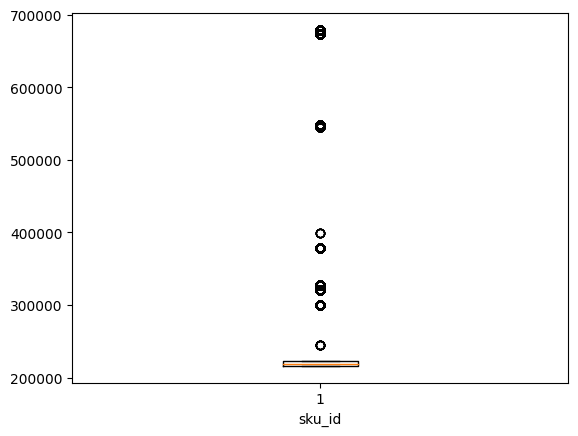

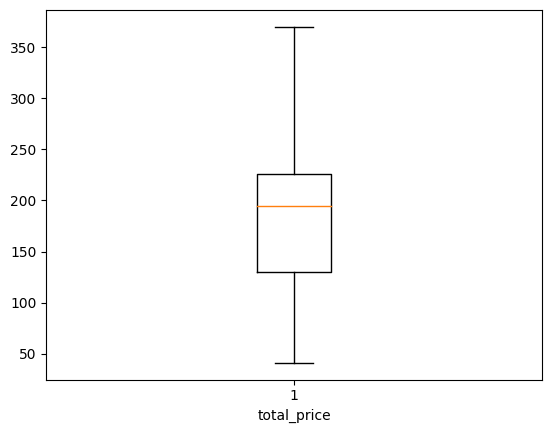

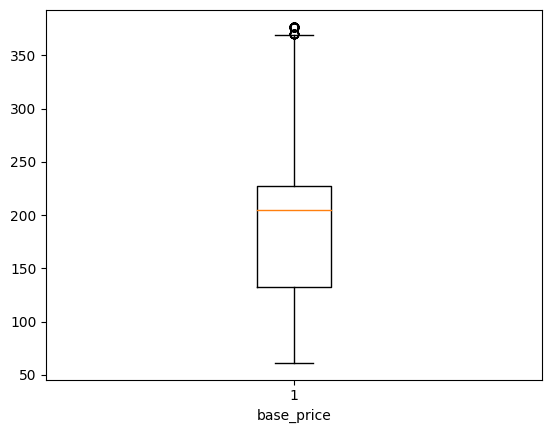

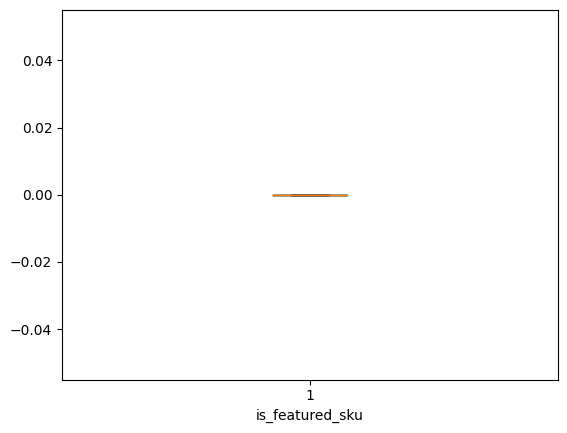

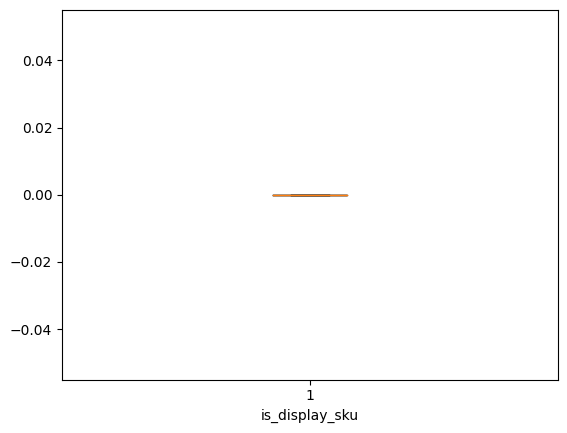

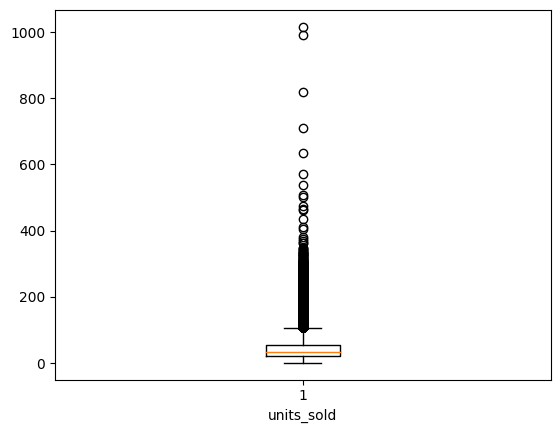

In [ ]:
Q1 = df.loc[:,'base_price'].quantile(0.25)
Q3 = df.loc[:,'base_price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df.loc[:,'base_price'] >= Q1 - 1.5*IQR) & (df.loc[:,'base_price'] <= Q3 + 1.5*IQR)]

Q1 = df.loc[:,'is_display_sku'].quantile(0.25)
Q3 = df.loc[:,'is_display_sku'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df.loc[:,'is_display_sku'] >= Q1 - 1.5*IQR) & (df.loc[:,'is_display_sku'] <= Q3 + 1.5*IQR)]

Q1 = df.loc[:,'is_featured_sku'].quantile(0.25)
Q3 = df.loc[:,'is_featured_sku'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df.loc[:,'is_featured_sku'] >= Q1 - 1.5*IQR) & (df.loc[:,'is_featured_sku'] <= Q3 + 1.5*IQR)]

Q1 = df.loc[:,'total_price'].quantile(0.25)
Q3 = df.loc[:,'total_price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df.loc[:,'total_price'] >= Q1 - 1.5*IQR) & (df.loc[:,'total_price'] <= Q3 + 1.5*IQR)]

for i in df.columns:
    if df[i].dtypes != 'object':
        plt.boxplot(x =df[i])
        plt.xlabel(i)
        plt.show()


In [ ]:
df.shape

(112684, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112684 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        112684 non-null  int64  
 1   week             112684 non-null  object 
 2   store_id         112684 non-null  int64  
 3   sku_id           112684 non-null  int64  
 4   total_price      112684 non-null  float64
 5   base_price       112684 non-null  float64
 6   is_featured_sku  112684 non-null  int64  
 7   is_display_sku   112684 non-null  int64  
 8   units_sold       112684 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 8.6+ MB


In [ ]:
# Select the target column for correlation analysis
target_column = df.loc[:,'units_sold']
y = df.loc[:,'units_sold']
x = df.iloc[:,2:8]
# Calculate the correlations between each column and the target column
correlations = x.corrwith(target_column).sort_values(ascending=False)

# Create a DataFrame to store the results
correlation_df = pd.DataFrame({'Column': correlations.index, 'Correlation': correlations.values.astype(float)})

# Display the DataFrame sorted by correlation values in descending order
correlation_df = correlation_df.reindex(correlation_df['Correlation'].abs().sort_values(ascending=False).index)

# Print the DataFrame
print(correlation_df)

            Column  Correlation
3           sku_id    -0.227586
2      total_price    -0.162105
1       base_price    -0.133915
0         store_id    -0.036136
4  is_featured_sku          NaN
5   is_display_sku          NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112684 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        112684 non-null  int64  
 1   week             112684 non-null  object 
 2   store_id         112684 non-null  int64  
 3   sku_id           112684 non-null  int64  
 4   total_price      112684 non-null  float64
 5   base_price       112684 non-null  float64
 6   is_featured_sku  112684 non-null  int64  
 7   is_display_sku   112684 non-null  int64  
 8   units_sold       112684 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 8.6+ MB


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, random_state = 0)

##### Train Test

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(x_train)
scaled_df = pd.DataFrame(X_scaled_train, columns=x_train.columns)
x_train = scaled_df

scaler = StandardScaler()
X_scaled_test = scaler.fit_transform(x_test)
scaled_df = pd.DataFrame(X_scaled_test, columns=x_train.columns)
x_test = scaled_df

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(90147, 6)
(22537, 6)
(90147,)
(22537,)


In [ ]:
regression_rmse = []
regression_models = []
r2_scores= []
def fit_predict_regression(model, x_train, x_test, y_train, y_test,regression_rmse):
    model = model
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    rmse= mean_squared_error(y_test, y_pred, squared=False)
    regression_rmse.append(rmse)
    r2_scores.append(r2_score(y_test, y_pred))
    regression_models.append(str(model))
    print(f"RMSE of {model}: {rmse}")
    #plt.figure(figsize = (4,3))
    #x_values = range(len(y_pred))
    # Plot 'expected' as dots (scatter plot)
    #plt.scatter(x_values, y_test, label='Expected', marker='o', color='red')
    # Plot 'y_pred' as a line
    #plt.plot(x_values, y_pred, label='Predicted', linestyle='-', color='green')
    # Add labels and legend
    #plt.title(f"{model}")
    #plt.xlabel('Sample Index')
    #plt.ylabel('Values')
    #plt.legend()
    # Show the plot
    #plt.show()
    return y_pred

y_pred_lr = fit_predict_regression(LinearRegression(),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_r = fit_predict_regression(Ridge(alpha=.5),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_l = fit_predict_regression(Lasso(alpha=.5),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_e = fit_predict_regression(ElasticNetCV(cv = 5, random_state = 0),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_sgd = fit_predict_regression(SGDRegressor(max_iter=1000, tol=1),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_svr = fit_predict_regression(SVR(C=1.0, epsilon=0.2, kernel = "poly"),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_knn = fit_predict_regression(KNeighborsRegressor(n_neighbors=9),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_dtr = fit_predict_regression(DecisionTreeRegressor(),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_gbr = fit_predict_regression(GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=0,loss='squared_error'),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_hgbr = fit_predict_regression(HistGradientBoostingRegressor(),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_rf = fit_predict_regression(RandomForestRegressor(),x_train,x_test,y_train,y_test,regression_rmse)

RMSE of LinearRegression(): 33.87880626399355
RMSE of Ridge(alpha=0.5): 33.8788120528006
RMSE of Lasso(alpha=0.5): 34.10878612023154
RMSE of ElasticNetCV(cv=5, random_state=0): 33.90102285105181
RMSE of SGDRegressor(tol=1): 33.907102758002615


In [ ]:
dic = {"Base Models":regression_models,
       "RMSE":regression_rmse,
       "R2 Scores":r2_scores}
dfr = pd.DataFrame(dic)
dfr.sort_values(by = ['RMSE'], ascending = True)

In [ ]:
test_pred = pd.DataFrame()
test_pred['y_test'] = y_test
test_pred['Linear Regression'] = y_pred_lr
test_pred['Ridge'] = y_pred_r
test_pred['Lasso'] = y_pred_l
test_pred['ElasticNet'] = y_pred_e
test_pred['SGD'] = y_pred_sgd
test_pred['SVR'] = y_pred_svr
test_pred['KNN'] =y_pred_knn
test_pred['Decision Tree'] = y_pred_dtr
test_pred['Gradient Boost'] = y_pred_gbr
test_pred['Hist Gradient Boost'] = y_pred_hgbr
test_pred['Random Forest'] = y_pred_rf
test_pred

y_test  Linear Regression      Ridge      Lasso  ElasticNet  \
58499       69          44.193066  44.193046  43.739149   44.178041   
18352       45          40.785794  40.785799  40.482252   40.784646   
130328      98          45.758911  45.758879  45.594824   45.741578   
761         33          38.760942  38.760962  38.588707   38.768517   
42654       56          40.513637  40.513644  40.406510   40.515688   
...        ...                ...        ...        ...         ...   
54804       13          45.085252  45.085226  44.496568   45.065511   
132156      32          31.708037  31.708105  33.286780   31.760660   
138602      35          44.183839  44.183818  44.269342   44.174962   
23280       31          34.269573  34.269625  34.801617   34.301178   
111102      20          40.809656  40.809660  41.126057   40.815451   

              SGD        SVR        KNN  Decision Tree  Gradient Boost  \
58499   43.671421  36.368556  32.333333           32.0       50.009354   
18352   40.655774  35.254187  32.555556           15.0       44.901953   
130328  44.693606  38.662606  74.888889           91.0       57.016558   
761     38.821155  32.754136  30.777778           48.0       33.439570   
42654   40.228053  35.819071  45.000000           34.0       45.679974   
...           ...        ...        ...            ...             ...   
54804   44.557716  36.731894  34.888889            6.0       34.398611   
132156  31.120131  23.002199  46.222222           21.0       41.125980   
138602  43.117108  38.381892  30.666667           13.0       40.068014   
23280   34.333258  31.234826  28.333333           32.0       28.595604   
111102  40.047677  36.047622  68.555556          108.0       52.220345   

        Hist Gradient Boost  Random Forest  
58499             41.275926          46.35  
18352             41.902988          14.94  
130328            63.906315          74.05  
761               41.287479          49.09  
42654             55.628054          41.01  
...                     ...            ...  
54804             32.858513          32.45  
132156            25.071117          27.93  
138602            28.278758          21.09  
23280             29.279271          28.84  
111102            52.545011          82.61  

[17546 rows x 12 columns]

In [ ]:
regression_rmse = []
r2_scores= []
y_pred_lr = y_pred_lr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_lr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_lr))

y_pred_r = y_pred_r.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_r, squared=False))
r2_scores.append(r2_score(y_test, y_pred_r))

y_pred_l = y_pred_l.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_l, squared=False))
r2_scores.append(r2_score(y_test, y_pred_l))

y_pred_e = y_pred_e.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_e, squared=False))
r2_scores.append(r2_score(y_test, y_pred_e))

y_pred_sgd = y_pred_sgd.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_sgd, squared=False))
r2_scores.append(r2_score(y_test, y_pred_sgd))

y_pred_svr = y_pred_svr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_svr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_svr))

y_pred_knn = y_pred_knn.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_knn, squared=False))
r2_scores.append(r2_score(y_test, y_pred_knn))

y_pred_dtr = y_pred_dtr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_dtr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_dtr))

y_pred_gbr = y_pred_gbr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_gbr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_gbr))

y_pred_hgbr = y_pred_hgbr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_hgbr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_hgbr))

y_pred_rf = y_pred_rf.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_rf, squared=False))
r2_scores.append(r2_score(y_test, y_pred_rf))

In [ ]:
dic = {"Base Models":regression_models,
       "RMSE":regression_rmse,
       "R2 Scores":r2_scores}
dfrr = pd.DataFrame(dic)
dfrr.sort_values(by = ['RMSE'], ascending = True)

Base Models       RMSE  R2 Scores
9                     HistGradientBoostingRegressor()  22.167779   0.230373
6                  KNeighborsRegressor(n_neighbors=9)  23.125030   0.162469
8   GradientBoostingRegressor(max_depth=1, n_estim...  23.338392   0.146943
3                  ElasticNetCV(cv=5, random_state=0)  24.937826   0.026013
2                                    Lasso(alpha=0.5)  24.938566   0.025955
0                                  LinearRegression()  24.940535   0.025801
1                                    Ridge(alpha=0.5)  24.940535   0.025801
4                                 SGDRegressor(tol=1)  24.952439   0.024871
10                            RandomForestRegressor()  25.703704  -0.034731
5                     SVR(epsilon=0.2, kernel='poly')  25.740349  -0.037684
7                             DecisionTreeRegressor()  31.283854  -0.532769

#### Few Outliers Removal

In [ ]:
df = pd.read_csv('Traindata.csv')
df.shape

(150150, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [ ]:
df.head(1)

record_ID        week  store_id  sku_id  total_price  base_price  \
0          1  17-01-2011      8091  216418      99.0375    111.8625   

   is_featured_sku  is_display_sku  units_sold  
0                0               0          20

In [ ]:
df.dropna(inplace = True)
df.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

record_ID       store_id         sku_id    total_price  \
count  150149.000000  150149.000000  150149.000000  150149.000000   
mean   106270.971795    9199.420935  254761.195226     206.626751   
std     61385.825580     615.593192   85547.587866     103.308516   
min         1.000000    8023.000000  216233.000000      41.325000   
25%     53111.000000    8562.000000  217217.000000     130.387500   
50%    106226.000000    9371.000000  222087.000000     198.075000   
75%    159452.000000    9731.000000  245338.000000     233.700000   
max    212644.000000    9984.000000  679023.000000     562.162500   

          base_price  is_featured_sku  is_display_sku     units_sold  
count  150149.000000    150149.000000   150149.000000  150149.000000  
mean      219.424262         0.095612        0.133201      51.674543  
std       110.960204         0.294059        0.339793      60.207962  
min        61.275000         0.000000        0.000000       1.000000  
25%       133.237500         0.000000        0.000000      20.000000  
50%       205.912500         0.000000        0.000000      35.000000  
75%       234.412500         0.000000        0.000000      62.000000  
max       562.162500         1.000000        1.000000    2876.000000

<ipython-input-13-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

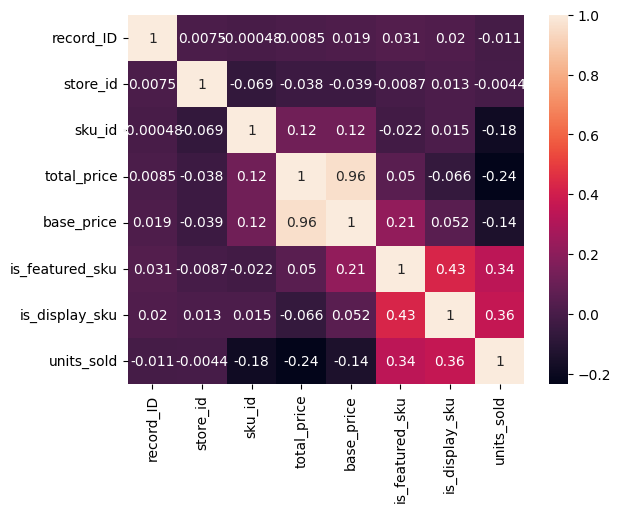

In [ ]:
sns.heatmap(df.corr(), annot = True)

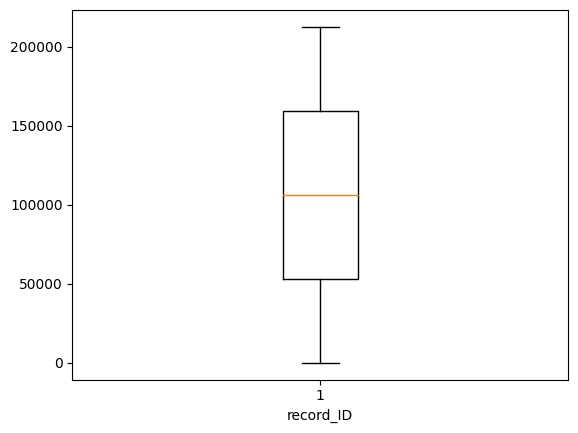

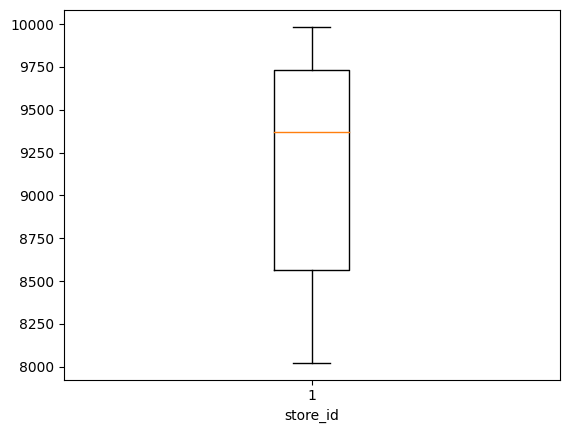

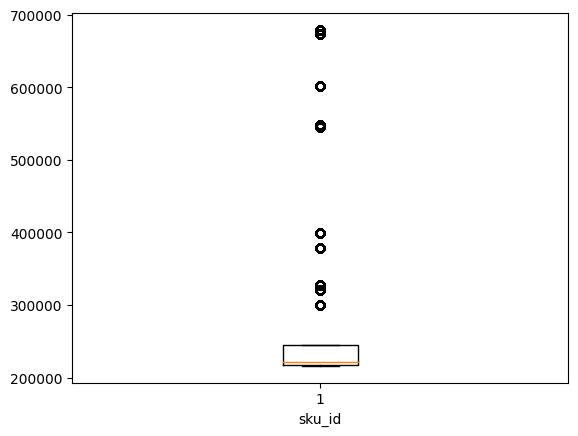

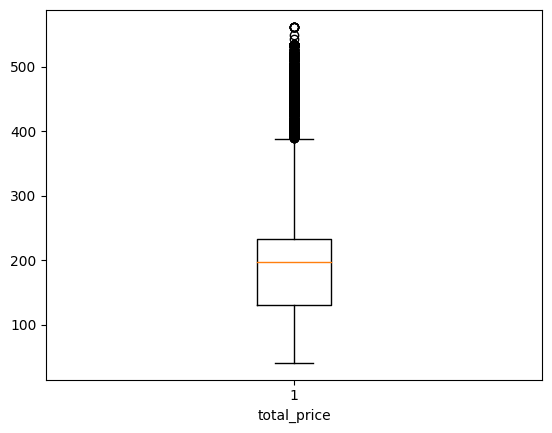

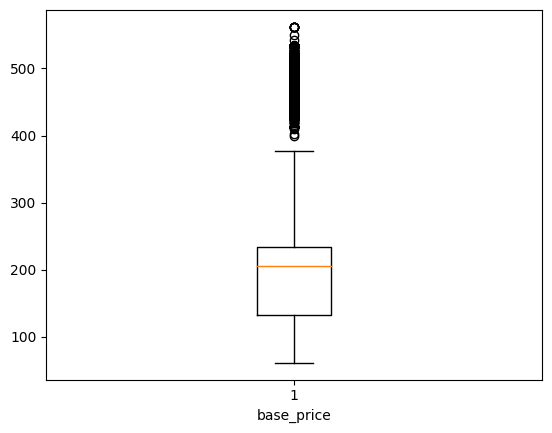

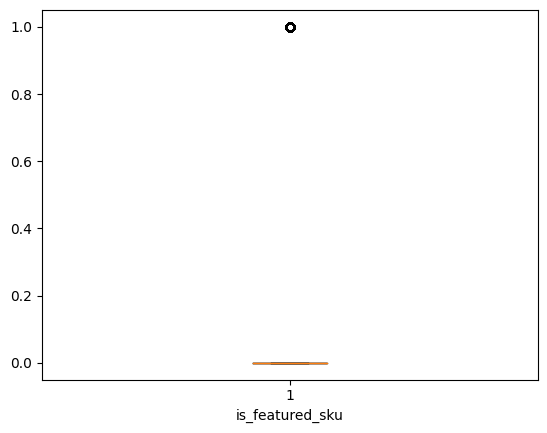

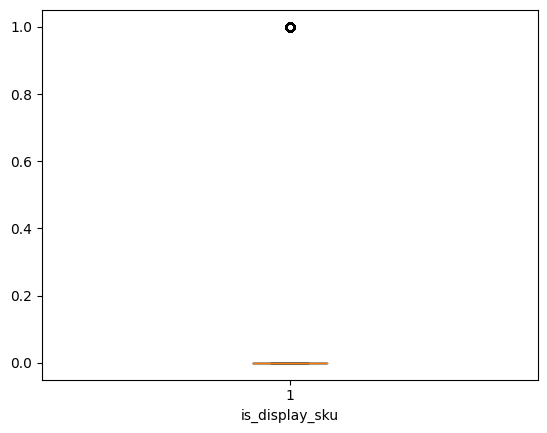

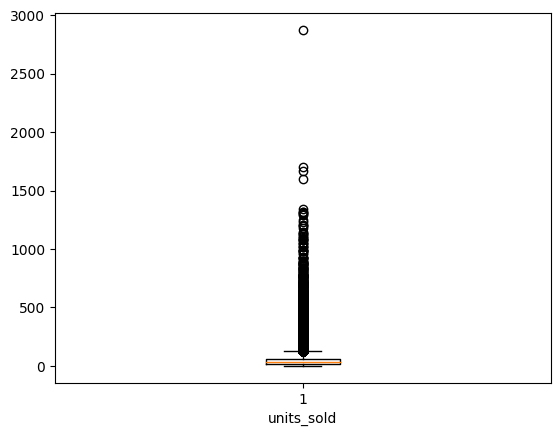

In [ ]:
for i in df.columns:
    if df[i].dtypes != 'object':
        plt.boxplot(x =df[i])
        plt.xlabel(i)
        plt.show()

In [ ]:
df[['base_price','units_sold']].groupby('units_sold').count()

base_price
units_sold            
1                  411
2                  427
3                  402
4                 1382
5                  979
...                ...
1341                 1
1599                 1
1669                 1
1705                 1
2876                 1

[708 rows x 1 columns]

<Axes: >

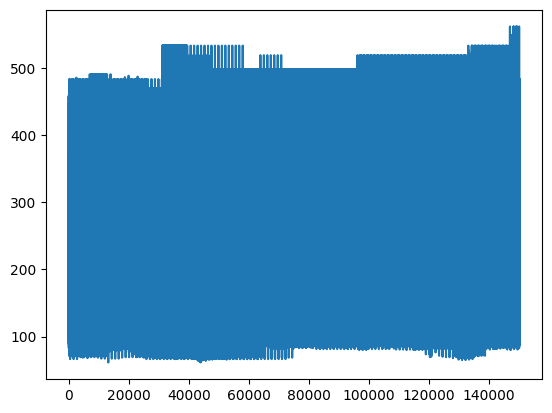

In [ ]:
df['base_price'].plot(kind = 'line')

In [ ]:
Q1 = df.loc[:,'base_price'].quantile(0.25)
Q3 = df.loc[:,'base_price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df.loc[:,'base_price'] >= Q1 - 1.5*IQR) & (df.loc[:,'base_price'] <= Q3 + 1.5*IQR)]

Q1 = df.loc[:,'is_display_sku'].quantile(0.25)
Q3 = df.loc[:,'is_display_sku'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df.loc[:,'is_display_sku'] >= Q1 - 1.5*IQR) & (df.loc[:,'is_display_sku'] <= Q3 + 1.5*IQR)]

Q1 = df.loc[:,'is_featured_sku'].quantile(0.25)
Q3 = df.loc[:,'is_featured_sku'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df.loc[:,'is_featured_sku'] >= Q1 - 1.5*IQR) & (df.loc[:,'is_featured_sku'] <= Q3 + 1.5*IQR)]

Q1 = df.loc[:,'total_price'].quantile(0.25)
Q3 = df.loc[:,'total_price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df.loc[:,'total_price'] >= Q1 - 1.5*IQR) & (df.loc[:,'total_price'] <= Q3 + 1.5*IQR)]

In [ ]:
df.shape

(112684, 9)

In [ ]:
# Select the target column for correlation analysis
target_column = df.iloc[:, 8]

# Calculate the correlations between each column and the target column
correlations = df.iloc[:, 0:9].corrwith(target_column).sort_values(ascending=False)

# Create a DataFrame to store the results
correlation_df = pd.DataFrame({'Column': correlations.index, 'Correlation': correlations.values.astype(float)})

# Display the DataFrame sorted by correlation values in descending order
correlation_df = correlation_df.reindex(correlation_df['Correlation'].abs().sort_values(ascending=False).index)

# Print the DataFrame
print(correlation_df)

            Column  Correlation
0       units_sold     1.000000
5           sku_id    -0.227586
4      total_price    -0.162105
3       base_price    -0.133915
2         store_id    -0.036136
1        record_ID     0.009734
6  is_featured_sku          NaN
7   is_display_sku          NaN


<ipython-input-19-a5d26e416fc8>:5: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.iloc[:, 0:9].corrwith(target_column).sort_values(ascending=False)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112684 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        112684 non-null  int64  
 1   week             112684 non-null  object 
 2   store_id         112684 non-null  int64  
 3   sku_id           112684 non-null  int64  
 4   total_price      112684 non-null  float64
 5   base_price       112684 non-null  float64
 6   is_featured_sku  112684 non-null  int64  
 7   is_display_sku   112684 non-null  int64  
 8   units_sold       112684 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 8.6+ MB


In [ ]:
x = df.iloc[:, 3:8]
y = df.iloc[:, 8]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, random_state = 0)

##### Train Test

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(x_train)
scaled_df = pd.DataFrame(X_scaled_train, columns=x_train.columns)
x_train = scaled_df

scaler = StandardScaler()
X_scaled_test = scaler.fit_transform(x_test)
scaled_df = pd.DataFrame(X_scaled_test, columns=x_train.columns)
x_test = scaled_df

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(90147, 5)
(22537, 5)
(90147,)
(22537,)


In [ ]:
regression_rmse = []
regression_models = []
r2_scores= []
def fit_predict_regression(model, x_train, x_test, y_train, y_test,regression_rmse):
    model = model
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    rmse= mean_squared_error(y_test, y_pred, squared=False)
    regression_rmse.append(rmse)
    r2_scores.append(r2_score(y_test, y_pred))
    regression_models.append(str(model))
    print(f"RMSE of {model}: {rmse}")
    #plt.figure(figsize = (4,3))
    #x_values = range(len(y_pred))
    # Plot 'expected' as dots (scatter plot)
    #plt.scatter(x_values, y_test, label='Expected', marker='o', color='red')
    # Plot 'y_pred' as a line
    #plt.plot(x_values, y_pred, label='Predicted', linestyle='-', color='green')
    ## Add labels and legend
    #plt.title(f"{model}")
    #plt.xlabel('Sample Index')
    #plt.ylabel('Values')
    #plt.legend()
    # Show the plot
    #plt.show()
    return y_pred

y_pred_lr = fit_predict_regression(LinearRegression(),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_r = fit_predict_regression(Ridge(alpha=.5),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_l = fit_predict_regression(Lasso(alpha=.5),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_e = fit_predict_regression(ElasticNetCV(cv = 5, random_state = 0),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_sgd = fit_predict_regression(SGDRegressor(max_iter=1000, tol=1),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_svr = fit_predict_regression(SVR(C=1.0, epsilon=0.2, kernel = "poly"),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_knn = fit_predict_regression(KNeighborsRegressor(n_neighbors=9),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_dtr = fit_predict_regression(DecisionTreeRegressor(),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_gbr = fit_predict_regression(GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=0,loss='squared_error'),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_hgbr = fit_predict_regression(HistGradientBoostingRegressor(),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_rf = fit_predict_regression(RandomForestRegressor(),x_train,x_test,y_train,y_test,regression_rmse)

RMSE of LinearRegression(): 33.92856583837791
RMSE of Ridge(alpha=0.5): 33.92857190560445
RMSE of Lasso(alpha=0.5): 34.152718252866485
RMSE of ElasticNetCV(cv=5, random_state=0): 33.95095878873616
RMSE of SGDRegressor(tol=1): 33.94060711507795
RMSE of SVR(epsilon=0.2, kernel='poly'): 36.02867119530799
RMSE of KNeighborsRegressor(n_neighbors=9): 30.531456507811157
RMSE of DecisionTreeRegressor(): 34.043796836007935
RMSE of GradientBoostingRegressor(max_depth=1, n_estimators=1000, random_state=0): 31.213295564215084
RMSE of HistGradientBoostingRegressor(): 31.154207798475742
RMSE of RandomForestRegressor(): 33.66875118832946


In [ ]:
dic = {"Base Models":regression_models,
       "RMSE":regression_rmse,
       "R2 Scores":r2_scores}
dfr = pd.DataFrame(dic)
dfr.sort_values(by = ['RMSE'], ascending = True)

Base Models       RMSE  R2 Scores
6                  KNeighborsRegressor(n_neighbors=9)  30.531457   0.262660
9                     HistGradientBoostingRegressor()  31.154208   0.232274
8   GradientBoostingRegressor(max_depth=1, n_estim...  31.213296   0.229359
10                            RandomForestRegressor()  33.668751   0.103342
0                                  LinearRegression()  33.928566   0.089450
1                                    Ridge(alpha=0.5)  33.928572   0.089449
4                                 SGDRegressor(tol=1)  33.940607   0.088803
3                  ElasticNetCV(cv=5, random_state=0)  33.950959   0.088247
7                             DecisionTreeRegressor()  34.043797   0.083254
2                                    Lasso(alpha=0.5)  34.152718   0.077379
5                     SVR(epsilon=0.2, kernel='poly')  36.028671  -0.026761

In [ ]:
test_pred = pd.DataFrame()
test_pred['y_test'] = y_test
test_pred['Linear Regression'] = y_pred_lr
test_pred['Ridge'] = y_pred_r
test_pred['Lasso'] = y_pred_l
test_pred['ElasticNet'] = y_pred_e
test_pred['SGD'] = y_pred_sgd
test_pred['SVR'] = y_pred_svr
test_pred['KNN'] =y_pred_knn
test_pred['Decision Tree'] = y_pred_dtr
test_pred['Gradient Boost'] = y_pred_gbr
test_pred['Hist Gradient Boost'] = y_pred_hgbr
test_pred['Random Forest'] = y_pred_rf
test_pred

y_test  Linear Regression      Ridge      Lasso  ElasticNet  \
14512       15          41.433692  41.433932  42.354204   41.717902   
15430       46          33.740362  33.740583  34.581431   34.007404   
94223       66          44.413405  44.413653  45.377299   44.706320   
118756      26          40.630376  40.630618  41.581128   40.919076   
59207       40          42.523639  42.523886  43.496205   42.816933   
...        ...                ...        ...        ...         ...   
30659        7          -1.270625  -1.270100   2.546534   -0.537475   
66291      103          58.614516  58.611710  46.319496   55.226690   
5894        45          73.391507  73.386449  51.322348   67.287982   
12723       99          45.150398  45.150652  46.145398   45.448789   
57338       88          52.124086  52.122547  45.319267   50.262336   

              SGD        SVR        KNN  Decision Tree  Gradient Boost  \
14512   40.895627  34.793420  20.111111      23.647541       35.251345   
15430   33.913343  30.217285  40.333333      41.564265       40.229267   
94223   43.593112  34.521990  86.555556      69.192090       72.081066   
118756  40.145684  34.657065  33.000000      28.475439       26.814020   
59207   41.862739  34.614459  29.333333      31.144040       41.963170   
...           ...        ...        ...            ...             ...   
30659    0.330495   9.681067  13.000000      12.508197       13.722425   
66291   57.759404  36.941912  48.333333      51.750000       57.062160   
5894    72.118179  47.919191  43.666667      38.666667       64.329796   
12723   44.249264  34.471943  48.666667      35.285714       55.752065   
57338   51.345391  35.340744  74.777778      78.600000       72.081066   

        Hist Gradient Boost  Random Forest  
14512             23.344042      23.543189  
15430             42.694744      41.576429  
94223             73.884899      68.848322  
118756            28.472921      28.402871  
59207             32.184009      31.057441  
...                     ...            ...  
30659             16.263138      15.366783  
66291             54.474973      53.000037  
5894              33.570719      38.221667  
12723             57.116203      35.351684  
57338             65.645921      78.445370  

[22537 rows x 12 columns]

In [ ]:
regression_rmse = []
r2_scores= []
y_pred_lr = y_pred_lr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_lr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_lr))

y_pred_r = y_pred_r.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_r, squared=False))
r2_scores.append(r2_score(y_test, y_pred_r))

y_pred_l = y_pred_l.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_l, squared=False))
r2_scores.append(r2_score(y_test, y_pred_l))

y_pred_e = y_pred_e.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_e, squared=False))
r2_scores.append(r2_score(y_test, y_pred_e))

y_pred_sgd = y_pred_sgd.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_sgd, squared=False))
r2_scores.append(r2_score(y_test, y_pred_sgd))

y_pred_svr = y_pred_svr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_svr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_svr))

y_pred_knn = y_pred_knn.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_knn, squared=False))
r2_scores.append(r2_score(y_test, y_pred_knn))

y_pred_dtr = y_pred_dtr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_dtr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_dtr))

y_pred_gbr = y_pred_gbr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_gbr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_gbr))

y_pred_hgbr = y_pred_hgbr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_hgbr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_hgbr))

y_pred_rf = y_pred_rf.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_rf, squared=False))
r2_scores.append(r2_score(y_test, y_pred_rf))

In [ ]:
dic = {"Base Models":regression_models,
       "RMSE":regression_rmse,
       "R2 Scores":r2_scores}
dfrr = pd.DataFrame(dic)
dfrr.sort_values(by = ['RMSE'], ascending = True)

Base Models       RMSE  R2 Scores
6                  KNeighborsRegressor(n_neighbors=9)  30.543428   0.262081
9                     HistGradientBoostingRegressor()  31.213340   0.229357
8   GradientBoostingRegressor(max_depth=1, n_estim...  31.226545   0.228705
10                            RandomForestRegressor()  33.711320   0.101073
3                  ElasticNetCV(cv=5, random_state=0)  33.935708   0.089066
4                                 SGDRegressor(tol=1)  33.943788   0.088633
1                                    Ridge(alpha=0.5)  33.946644   0.088479
0                                  LinearRegression()  33.946747   0.088474
7                             DecisionTreeRegressor()  34.080132   0.081296
2                                    Lasso(alpha=0.5)  34.172132   0.076330
5                     SVR(epsilon=0.2, kernel='poly')  36.145059  -0.033406